# Ross Sea sea ice dynamics
## Level sea ice freeboard & ridge height/fraction

In [2]:
import warnings
warnings.filterwarnings('ignore')
#Import necesary modules
#Use shorter names (np, pd, plt) instead of full (numpy, pandas, matplotlib.pylot) for convenience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import h5py
# import s3fs
# import readers as rd
# import xarray as xr
import utils as ut
import os
import glob
import datetime as dt
# from progress.bar import Bar
from astropy.time import Time
from shapely.geometry import Point
import geopandas
import scipy.stats as stats
import netCDF4
from netCDF4 import Dataset    # Note: python is case-sensitive!
from netCDF4 import date2num,num2date
import cartopy

from pyproj import Proj, transform
from shapely.geometry import Polygon

from tqdm import tqdm
import matplotlib.ticker as mticker

# from mpl_toolkits.basemap import Basemap

%load_ext autoreload
%autoreload 2

from readers import *

In [2]:
## Import daily ERA5 from Google Earth Engine
import ee
import geemap
ee.Initialize()

In [219]:
NW = ee.Geometry.Rectangle([168, -74, -172, -70]);
SW = ee.Geometry.Rectangle([168, -78, -172, -74]);
NE = ee.Geometry.Rectangle([-172, -74, -150, -70]);
SE = ee.Geometry.Rectangle([-172, -78, -150, -74]);
ross = ee.Geometry.Rectangle([168, -78, -150, -70]);

roi_list = [NW, SW, NE, SE, ross]
roi_name = ["NW", "SW", "NE", "SE", "Ross"]

imgcol = ee.ImageCollection("ECMWF/ERA5/MONTHLY")

for i in range(0, len(roi_list)):
    roi = roi_list[i]
    first = True
    for field in ["mean_2m_air_temperature", "minimum_2m_air_temperature", "maximum_2m_air_temperature",\
                  "surface_pressure", "u_component_of_wind_10m", "v_component_of_wind_10m"]:
        def temp_series(img):
            mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=roi, scale=25000).get(field)
            return img.set('date', img.date().format()).set(field,mean)

        reduced_imgs = imgcol.map(temp_series)

        data_list = reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date', field]).values().get(0)
        df = pd.DataFrame(data_list.getInfo(), columns=['date', field])
        df['date'] = pd.to_datetime(df['date'])
        df['year'] = df['date'].dt.year
        df['month'] = df['date'].dt.month

        if first:
            df2 = df
            first = False
        else:
            df2[field] = df[field]
            
        print(field)
        
    df2['wind'] = (df2["u_component_of_wind_10m"]**2 + df2["v_component_of_wind_10m"]**2)**0.5
    df2.to_csv("F:\\2022_Ross\\ERA5\\TS_ERA_{0}_{1}_{2}.csv".format(roi_name[i], 1979, 2020))
    print(roi_name[i])

mean_2m_air_temperature
minimum_2m_air_temperature
maximum_2m_air_temperature
surface_pressure
u_component_of_wind_10m
v_component_of_wind_10m
NW
mean_2m_air_temperature
minimum_2m_air_temperature
maximum_2m_air_temperature
surface_pressure
u_component_of_wind_10m
v_component_of_wind_10m
SW
mean_2m_air_temperature
minimum_2m_air_temperature
maximum_2m_air_temperature
surface_pressure
u_component_of_wind_10m
v_component_of_wind_10m
NE
mean_2m_air_temperature
minimum_2m_air_temperature
maximum_2m_air_temperature
surface_pressure
u_component_of_wind_10m
v_component_of_wind_10m
SE
mean_2m_air_temperature
minimum_2m_air_temperature
maximum_2m_air_temperature
surface_pressure
u_component_of_wind_10m
v_component_of_wind_10m
Ross


Text(0, 0.5, 'V-component wind (m/s)')

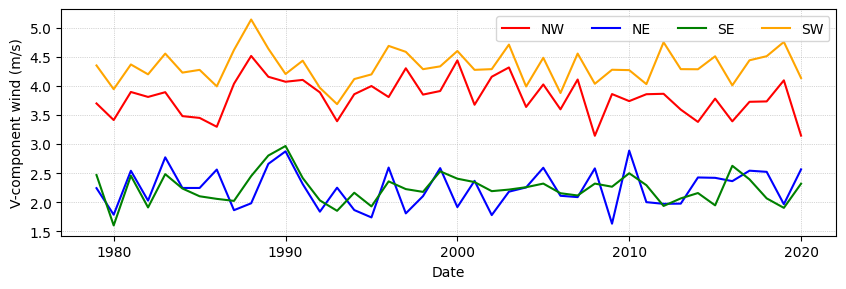

In [253]:
colors = ["red", "blue", "green", "orange"]
roi_name = ["NW", "NE", "SE", "SW"]

plt.figure(figsize = (10, 3), dpi = 100)
for i in range(0, len(roi_name)):
    
    # Monthly & daily sampling
    df0 = pd.read_csv("F:\\2022_Ross\\ERA5\\TS_ERA_{0}_{1}_{2}.csv".format(roi_name[i], 1979, 2020))
    df0['datetime'] = pd.to_datetime(df0['date'])
    
    df_year = df0.groupby(by = "year", as_index = False).mean()
#     df_month = df_data.groupby(by = "month_num", as_index = False).mean()
    
    

#     df_daily['date_str'] = df_daily['date_num'].astype(str)
#     df_daily['datetime'] = pd.to_datetime(df_daily['date_str'], format = "%Y%m%d")
#     df_month['month_str'] = df_month['month_num'].astype(str)
#     df_month['datetime_mon'] = pd.to_datetime(df_month['month_str'], format = "%Y%m%d")

    field = "wind"
    
#     plt.plot(df_daily['datetime'], df_daily[field], color = colors[i])
    plt.plot(df_year['year'], df_year[field], color = colors[i], label = roi_name[i])
    # plt.plot(df1['date'], df1['v10'])
    # plt.ylim(-10, 10)

# plt.axhline(0, color = 'k', ls = ":", lw = 1.0)
plt.grid(ls = ":", lw = 0.5)
# plt.xlim(dt.datetime(2018, 9, 25), dt.datetime(2022, 11, 1))
plt.legend(ncol = 4)
plt.xlabel("Date")
plt.ylabel("V-component wind (m/s)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'V-component wind (m/s)')

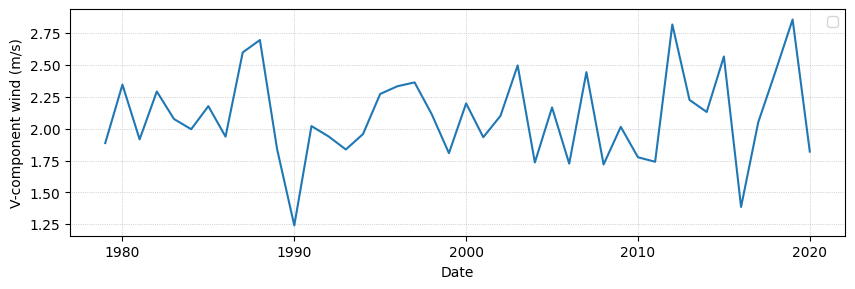

In [254]:
colors = ["red", "blue", "green", "orange"]
roi_name = ["NW", "NE", "SE", "SW"]
field = "wind"

plt.figure(figsize = (10, 3), dpi = 100)
    
# Monthly & daily sampling
df1 = pd.read_csv("F:\\2022_Ross\\ERA5\\TS_ERA_{0}_{1}_{2}.csv".format("SW", 1979, 2020))
df1['datetime'] = pd.to_datetime(df1['date'])
df_year1 = df1.groupby(by = "year", as_index = False).mean()


# Monthly & daily sampling
df2 = pd.read_csv("F:\\2022_Ross\\ERA5\\TS_ERA_{0}_{1}_{2}.csv".format("SE", 1979, 2020))
df2['datetime'] = pd.to_datetime(df2['date'])
df_year2 = df2.groupby(by = "year", as_index = False).mean()


plt.plot(df_year2['year'], df_year1[field] - df_year2[field])
# plt.axhline(0, color = 'k', ls = ":", lw = 1.0)
plt.grid(ls = ":", lw = 0.5)
# plt.xlim(dt.datetime(2018, 9, 25), dt.datetime(2022, 11, 1))
plt.legend(ncol = 4)
plt.xlabel("Date")
plt.ylabel("V-component wind (m/s)")

In [232]:
df_year

,year,Unnamed: 0,mean_2m_air_temperature,month,minimum_2m_air_temperature,maximum_2m_air_temperature,surface_pressure,u_component_of_wind_10m,v_component_of_wind_10m,wind
0,1979,5.5,256.918965,6.5,249.773912,263.938785,98385.723821,1.017561,4.123064,4.356005
1,1980,17.5,258.901284,6.5,250.634049,267.142196,98868.846925,1.317945,3.651253,3.947395
2,1981,29.5,257.548292,6.5,248.704527,266.176672,98732.887154,1.111950,4.086399,4.373036
3,1982,41.5,256.538793,6.5,248.521849,265.410978,98491.042512,0.724828,4.066700,4.203300
4,1983,53.5,257.852797,6.5,249.604696,267.023179,98458.430836,0.940984,4.352913,4.560448
5,1984,65.5,257.977479,6.5,250.200911,265.505738,98529.977240,1.504646,3.829346,4.233071
6,1985,77.5,256.294928,6.5,248.171998,264.359470,98327.484149,1.146826,4.011710,4.280132
7,1986,89.5,256.330477,6.5,247.414011,264.658768,98635.935165,1.289811,3.672442,3.996232
8,1987,101.5,257.415729,6.5,249.641669,267.219161,98709.495710,1.125456,4.452232,4.622803
9,1988,113.5,258.662670,6.5,250.242477,266.399628,98587.174711,0.945093,4.941516,5.147169


## Weather data (ERA5)

In [207]:
## Import daily ERA5 from Google Earth Engine
import ee
import geemap
ee.Initialize()



In [130]:
NW = ee.Geometry.Rectangle([168, -74, -172, -70]);
SW = ee.Geometry.Rectangle([168, -78, -172, -74]);
NE = ee.Geometry.Rectangle([-172, -74, -150, -70]);
SE = ee.Geometry.Rectangle([-172, -78, -150, -74]);

roi_list = [NW, SW, NE, SE]
roi_name = ["NW", "SW", "NE", "SE"]

for year in range(1980, 2023):
    for month in np.arange(1, 13):
        print(year, month)
        
        date1 = "{0}-{1}-01".format(year, month)
        if month == 12:
            date2 = "{0}-01-01".format(year+1)
        else:
            date2 = "{0}-{1}-01".format(year, month+1)
        
        for i in range(0, len(roi_list)):
            roi = roi_list[i]
            first = True
            for field in ["U2M", "V2M", "PS", "T2M"]:
                def temp_series(img):
                    mean = img.reduceRegion(reducer=ee.Reducer.max(), geometry=roi, scale=50000).get(field)
                    return img.set('date', img.date().format()).set(field,mean)

                imcol = ee.ImageCollection("NASA/GSFC/MERRA/slv/2").filterDate(date1, date2).select(field)
                reduced_imgs = imcol.map(temp_series)

                data_list = reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date', field]).values().get(0)
                df = pd.DataFrame(data_list.getInfo(), columns=['date', field])
                df['date'] = pd.to_datetime(df['date'])

                if first:
                    df2 = df
                    first = False
                else:
                    df2[field] = df[field]

            df2.to_csv("F:\\2022_Ross\\ERA5\\TS_MERRA_max_{0}_{1}_{2}.csv".format(roi_name[i], year, month))
        


# u10 = ee.ImageCollection("NASA/GSFC/MERRA/slv/2").filterDate("2019-10-01", "2019-11-01").select("PS") #.mean()
# # v10 = ee.ImageCollection("ECMWF/ERA5/DAILY").filterDate("2019-10-01").select("v_component_of_wind_10m")
# # u = u10.reduceRegion(reducer=ee.Reducer.mean(), geometry=NW, scale=50000).get("U2M").getInfo()

# reduced_imgs = u10.map(temp_u10, field = "PS", roi = NW)
# data_list = reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date','value']).values().get(0)
# df = pd.DataFrame(data_list.getInfo(), columns=['date', 'value'])
# df['date'] = pd.to_datetime(df['date'])

2018 1
2018 2
2018 3
2018 4
2018 5
2018 6
2018 7
2018 8
2018 9
2018 10
2018 11
2018 12
2019 1
2019 2
2019 3
2019 4
2019 5
2019 6
2019 7
2019 8
2019 9
2019 10
2019 11
2019 12
2020 1
2020 2
2020 3
2020 4
2020 5
2020 6
2020 7
2020 8
2020 9
2020 10
2020 11
2020 12
2021 1
2021 2
2021 3
2021 4
2021 5
2021 6
2021 7
2021 8
2021 9
2021 10
2021 11
2021 12
2022 1
2022 2
2022 3
2022 4
2022 5
2022 6
2022 7
2022 8
2022 9
2022 10
2022 11
2022 12


In [243]:
NW = ee.Geometry.Rectangle([168, -74, -172, -70]);
SW = ee.Geometry.Rectangle([168, -78, -172, -74]);
NE = ee.Geometry.Rectangle([-172, -74, -150, -70]);
SE = ee.Geometry.Rectangle([-172, -78, -150, -74]);

roi_list = [NW, SW, NE, SE]
roi_name = ["NW", "SW", "NE", "SE"]

for i in range(0, len(roi_list)):
    print(roi_name[i], " ===================================")
    roi = roi_list[i]
    first = True
    df = pd.DataFrame({})
    k = 0
    
    for year in tqdm(range(1980, 2023)):
        for month in np.arange(1, 13):

            date1 = "{0}-{1}-01".format(year, month)
            if month == 12:
                date2 = "{0}-01-01".format(year+1)
            else:
                date2 = "{0}-{1}-01".format(year, month+1)
                
            df.loc[k, "date"] = date1

            for field in ["U2M", "V2M", "PS", "T2M"]:
                imcol = ee.ImageCollection("NASA/GSFC/MERRA/slv/2").filterDate(date1, date2).select(field).mean()
                df.loc[k, field] = imcol.reduceRegion(reducer=ee.Reducer.mean(), geometry=roi, scale=50000).get(field).getInfo()
                
            for field in ["EFLUX", "CDH", "FRSEAICE", "SPEEDMAX", "SPEED"]:
                imcol = ee.ImageCollection("NASA/GSFC/MERRA/flx/2").filterDate(date1, date2).select(field).mean()
                df.loc[k, field] = imcol.reduceRegion(reducer=ee.Reducer.mean(), geometry=roi, scale=50000).get(field).getInfo()
                    
            k += 1

    df.to_csv("F:\\2022_Ross\\ERA5\\TS_MERRA_monthly_{0}_{1}_{2}.csv".format(roi_name[i], 1980, 2023))
        


NW  ===================================


  0%|          | 0/43 [01:52<?, ?it/s]


KeyboardInterrupt: 

In [244]:
df

,date,U2M,V2M,PS,T2M,EFLUX,CDH,FRSEAICE,SPEEDMAX,SPEED
0,1980-1-01,0.970760,0.381379,98516.561631,271.965320,11.247716,0.008015,0.077609,7.579286,7.420984
1,1980-2-01,0.288806,1.687611,98676.152953,270.917556,23.906727,0.008688,0.032662,7.476692,7.287467
2,1980-3-01,0.713103,2.578319,98175.662789,268.178453,34.340726,0.011646,0.130574,10.157312,9.908160
3,1980-4-01,-0.317511,3.828179,98518.517124,262.179750,38.713246,0.012118,0.434245,NaN,NaN


In [241]:
pd.read_csv("F:\\2022_Ross\\ERA5\\TS_MERRA_monthly_{0}_{1}_{2}.csv".format(roi_name[i], 1980, 2023))

,Unnamed: 0,date,U2M,V2M,PS,T2M,EFLUX,CDH,FRSEAICE,SPEEDMAX,SPEED
0,0,1980-1-01,1980-1-01,1980-1-01,1980-1-01,1980-1-01,1980-1-01,1980-1-01,1980-1-01,1980-1-01,1980-1-01
1,1,1980-2-01,1980-2-01,1980-2-01,1980-2-01,1980-2-01,1980-2-01,1980-2-01,1980-2-01,1980-2-01,1980-2-01
2,2,1980-3-01,1980-3-01,1980-3-01,1980-3-01,1980-3-01,1980-3-01,1980-3-01,1980-3-01,1980-3-01,1980-3-01
3,3,1980-4-01,1980-4-01,1980-4-01,1980-4-01,1980-4-01,1980-4-01,1980-4-01,1980-4-01,1980-4-01,1980-4-01
4,4,1980-5-01,1980-5-01,1980-5-01,1980-5-01,1980-5-01,1980-5-01,1980-5-01,1980-5-01,1980-5-01,1980-5-01
...,...,...,...,...,...,...,...,...,...,...,...
511,511,2022-8-01,2022-8-01,2022-8-01,2022-8-01,2022-8-01,2022-8-01,2022-8-01,2022-8-01,2022-8-01,2022-8-01
512,512,2022-9-01,2022-9-01,2022-9-01,2022-9-01,2022-9-01,2022-9-01,2022-9-01,2022-9-01,2022-9-01,2022-9-01
513,513,2022-10-01,2022-10-01,2022-10-01,2022-10-01,2022-10-01,2022-10-01,2022-10-01,2022-10-01,2022-10-01,2022-10-01
514,514,2022-11-01,2022-11-01,2022-11-01,2022-11-01,2022-11-01,2022-11-01,2022-11-01,2022-11-01,2022-11-01,2022-11-01


In [238]:
date1 = "2019-01-01"
date2 = "2019-02-01"
field = "U2M"
imcol = ee.ImageCollection("NASA/GSFC/MERRA/slv/2").filterDate(date1, date2).select(field).mean()
reduced_imgs = imcol.reduceRegion(reducer=ee.Reducer.mean(), geometry=roi, scale=50000).get(field).getInfo()

In [239]:
reduced_imgs.getInfo()

-1.1286521187571388

In [ ]:
## Heat flux
NW = ee.Geometry.Rectangle([168, -74, -172, -70]);
SW = ee.Geometry.Rectangle([168, -78, -172, -74]);
NE = ee.Geometry.Rectangle([-172, -74, -150, -70]);
SE = ee.Geometry.Rectangle([-172, -78, -150, -74]);

roi_list = [NW, SW, NE, SE]
roi_name = ["NW", "SW", "NE", "SE"]

for year in [2018, 2019, 2020, 2021, 2022]:
    for month in np.arange(1, 13):
        print(year, month)
        
        date1 = "{0}-{1}-01".format(year, month)
        if month == 12:
            date2 = "{0}-01-01".format(year+1)
        else:
            date2 = "{0}-{1}-01".format(year, month+1)
        
        for i in range(0, len(roi_list)):
            roi = roi_list[i]
            first = True
            for field in ["CDH", "EFLUX", "FRSEAICE", "SPEEDMAX", "SPEED"]:
                def temp_series(img):
                    mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=roi, scale=50000).get(field)
                    return img.set('date', img.date().format()).set(field,mean)

                imcol = ee.ImageCollection("NASA/GSFC/MERRA/flx/2").filterDate(date1, date2).select(field)
                reduced_imgs = imcol.map(temp_series)

                data_list = reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date', field]).values().get(0)
                df = pd.DataFrame(data_list.getInfo(), columns=['date', field])
                df['date'] = pd.to_datetime(df['date'])

                if first:
                    df2 = df
                    first = False
                else:
                    df2[field] = df[field]

            df2.to_csv("F:\\2022_Ross\\ERA5\\TS_MERRA_flux_{0}_{1}_{2}.csv".format(roi_name[i], year, month))

2018 1


In [29]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

def conditional_count(df, field, vmin, vmax):
    # Count the number of data satifying the min/max value conditions
    array = df[field].values
    count = len(np.where((array >= vmin) & (array <= vmax))[0])
    return count

roi_name = ["NW", "NE", "SE", "SW"]

data = {}

for i in range(0, len(roi_name)):
    first = True
    for year in [2018, 2019, 2020, 2021, 2022]:
        for month in np.arange(1, 13):
            df0 = pd.read_csv("F:\\2022_Ross\\ERA5\\TS_MERRA_{0}_{1}_{2}.csv".format(roi_name[i], year, month), index_col=0)
            df0['date'] = pd.to_datetime(df0['date'])
            df0['wind'] = (df0["U2M"]**2+df0["V2M"]**2)**0.5
            df0['year'] = df0['date'].dt.year
            df0['month'] = df0['date'].dt.month
            df0['day'] = 14 #df0['date'].dt.day
            df0['date_num'] = df0['year']*10000 + df0['month']*100 + df0['day']
            df0['month_num'] = df0['year']*10000 + df0['month']*100 + df0['day']
            df0['date_str'] = df0['date_num'].astype(str)
            df0['month_str'] = df0['month_num'].astype(str)
            if first:
                df_data = df0
                first = False
            else:
                df_data = pd.concat([df_data, df0]).reset_index(drop=True) #df_data.append(df0).reset_index(drop=True)
    data[roi_name[i]] = df_data
print("DONE!")

DONE!


In [5]:
date_ticks = []
date_labels = []
for y in [2018, 2019, 2020, 2021, 2022]:
    for m in [1, 4, 7, 10]:
        
        if y == 2018:
            if m == 10:
                date_ticks.append(dt.datetime(y, m, 1))
                date_labels.append(dt.datetime(y, m, 1).strftime("%b"))
        else:
            date_ticks.append(dt.datetime(y, m, 1))
            if m == 1:
                date_labels.append(dt.datetime(y, m, 1).strftime("%b\n%Y"))
            else:
                date_labels.append(dt.datetime(y, m, 1).strftime("%b"))

Text(0, 0.5, 'V-component wind (m/s)')

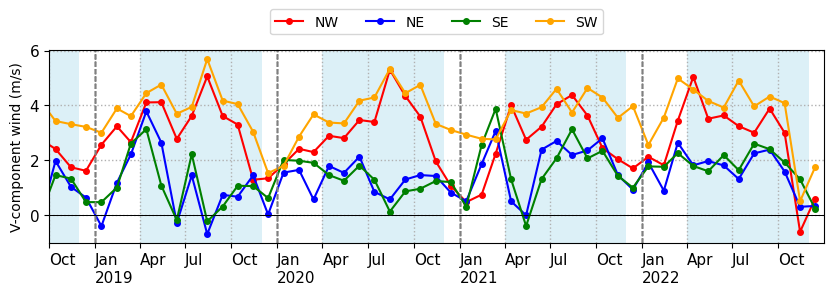

In [39]:
colors = ["red", "blue", "green", "orange"]
plt.figure(figsize = (10, 2.5), dpi = 100)
for i in range(0, len(roi_name)):
    
    # Monthly & daily sampling
    df_data = data[roi_name[i]] 
    df_daily = df_data.groupby(by = "date_num", as_index = False).mean()
    df_month = df_data.groupby(by = "month_num", as_index = False).mean()

    df_daily['date_str'] = df_daily['date_num'].astype(str)
    df_daily['datetime'] = pd.to_datetime(df_daily['date_str'], format = "%Y%m%d")
    df_month['month_str'] = df_month['month_num'].astype(str)
    df_month['datetime_mon'] = pd.to_datetime(df_month['month_str'], format = "%Y%m%d")

    field = "V2M"
    plt.axhline(0, color = 'k', ls = "-", lw = 0.5)
    
#     plt.plot(df_daily['datetime'], df_daily[field], color = colors[i])
    plt.plot(df_month['datetime_mon'], df_month[field], marker = 'o', ms = 4, color = colors[i], label = roi_name[i])
    # plt.plot(df1['date'], df1['v10'])
    # plt.ylim(-10, 10)
    
    for year in [2018, 2019, 2020, 2021, 2022]:
        plt.axvline(dt.datetime(year, 1, 1), color = 'grey', ls = "--", lw = 1.0)
        plt.axvspan(dt.datetime(year, 4, 1), dt.datetime(year, 12, 1), color = 'skyblue', alpha = 0.08, lw = 0)

# plt.axvline(dt.datetime(2021, 1, 1), color = 'k', ls = "--", lw = 1.0)
plt.legend(bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol = 4)
plt.grid(ls = ":", lw = 1)
plt.xticks(date_ticks, date_labels, fontsize = 11, ha = "left")
plt.yticks(fontsize = 11)
# plt.yscale('log')
plt.xlim(dt.datetime(2018, 10, 1), dt.datetime(2023,1,1))
plt.ylabel("V-component wind (m/s)")

Text(0, 0.5, 'U-component wind (m/s)')

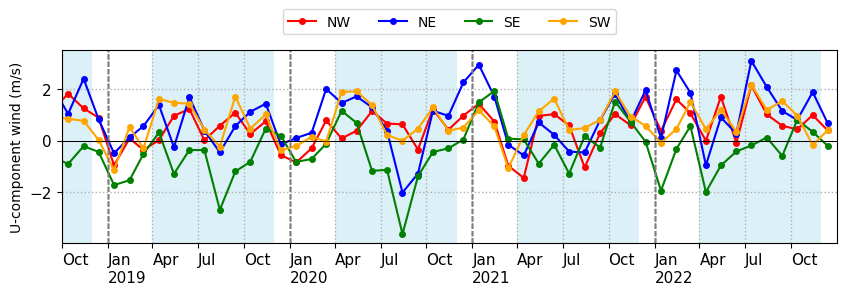

In [38]:
colors = ["red", "blue", "green", "orange"]
plt.figure(figsize = (10, 2.5), dpi = 100)
for i in range(0, len(roi_name)):
    
    # Monthly & daily sampling
    df_data = data[roi_name[i]] 
    df_daily = df_data.groupby(by = "date_num", as_index = False).mean()
    df_month = df_data.groupby(by = "month_num", as_index = False).mean()

    df_daily['date_str'] = df_daily['date_num'].astype(str)
    df_daily['datetime'] = pd.to_datetime(df_daily['date_str'], format = "%Y%m%d")
    df_month['month_str'] = df_month['month_num'].astype(str)
    df_month['datetime_mon'] = pd.to_datetime(df_month['month_str'], format = "%Y%m%d")

    field = "U2M"
    
#     plt.plot(df_daily['datetime'], df_daily[field], color = colors[i])
    plt.plot(df_month['datetime_mon'], df_month[field], marker = 'o', ms = 4, color = colors[i], label = roi_name[i])
    # plt.plot(df1['date'], df1['v10'])
    # plt.ylim(-10, 10)
    plt.axhline(0, color = 'k', ls = "-", lw = 0.5)
    
    for year in [2018, 2019, 2020, 2021, 2022]:
        plt.axvline(dt.datetime(year, 1, 1), color = 'grey', ls = "--", lw = 1.0)
        plt.axvspan(dt.datetime(year, 4, 1), dt.datetime(year, 12, 1), color = 'skyblue', alpha = 0.08, lw = 0)

# plt.axvline(dt.datetime(2021, 1, 1), color = 'k', ls = "--", lw = 1.0)
plt.legend(bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol = 4)
plt.grid(ls = ":", lw = 1)
plt.xticks(date_ticks, date_labels, fontsize = 11, ha = "left")
plt.yticks(fontsize = 11)
# plt.yscale('log')
plt.xlim(dt.datetime(2018, 10, 1), dt.datetime(2023,1,1))
plt.ylabel("U-component wind (m/s)")

Text(0, 0.5, 'Wind speed (m/s)')

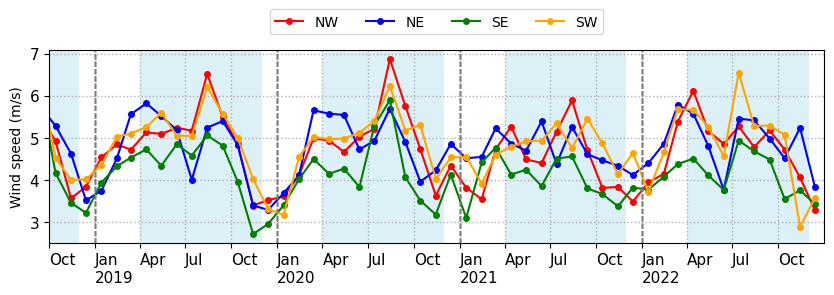

In [22]:
colors = ["red", "blue", "green", "orange"]
plt.figure(figsize = (10, 2.5), dpi = 100)
for i in range(0, len(roi_name)):
    
    # Monthly & daily sampling
    df_data = data[roi_name[i]] 
    df_daily = df_data.groupby(by = "date_num", as_index = False).mean()
    df_month = df_data.groupby(by = "month_num", as_index = False).mean()

    df_daily['date_str'] = df_daily['date_num'].astype(str)
    df_daily['datetime'] = pd.to_datetime(df_daily['date_str'], format = "%Y%m%d")
    df_month['month_str'] = df_month['month_num'].astype(str)
    df_month['datetime_mon'] = pd.to_datetime(df_month['month_str'], format = "%Y%m%d")

    field = "wind"
    
#     plt.plot(df_daily['datetime'], df_daily[field], color = colors[i])
    plt.plot(df_month['datetime_mon'], df_month[field], marker = 'o', ms = 4, color = colors[i], label = roi_name[i])
    # plt.plot(df1['date'], df1['v10'])
    # plt.ylim(-10, 10)
    
    for year in [2018, 2019, 2020, 2021, 2022]:
        plt.axvline(dt.datetime(year, 1, 1), color = 'grey', ls = "--", lw = 1.0)
        plt.axvspan(dt.datetime(year, 4, 1), dt.datetime(year, 12, 1), color = 'skyblue', alpha = 0.08, lw = 0)

# plt.axvline(dt.datetime(2021, 1, 1), color = 'k', ls = "--", lw = 1.0)
plt.legend(bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol = 4)
plt.grid(ls = ":", lw = 1)
plt.xticks(date_ticks, date_labels, fontsize = 11, ha = "left")
plt.yticks(fontsize = 11)
# plt.yscale('log')
plt.xlim(dt.datetime(2018, 10, 1), dt.datetime(2023,1,1))
plt.ylabel("Wind speed (m/s)")

Text(0, 0.5, 'Temperature (deg C)')

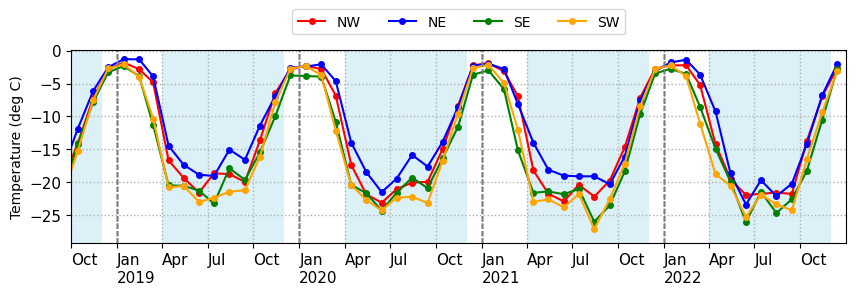

In [31]:
colors = ["red", "blue", "green", "orange"]
plt.figure(figsize = (10, 2.5), dpi = 100)
for i in range(0, len(roi_name)):
    
    # Monthly & daily sampling
    df_data = data[roi_name[i]] 
    df_daily = df_data.groupby(by = "date_num", as_index = False).mean()
    df_month = df_data.groupby(by = "month_num", as_index = False).mean()

    df_daily['date_str'] = df_daily['date_num'].astype(str)
    df_daily['datetime'] = pd.to_datetime(df_daily['date_str'], format = "%Y%m%d")
    df_month['month_str'] = df_month['month_num'].astype(str)
    df_month['datetime_mon'] = pd.to_datetime(df_month['month_str'], format = "%Y%m%d")

    field = "T2M"
    
#     plt.plot(df_daily['datetime'], df_daily[field], color = colors[i])
    plt.plot(df_month['datetime_mon'], df_month[field]-273.15, marker = 'o', ms = 4, color = colors[i], label = roi_name[i])
    # plt.plot(df1['date'], df1['v10'])
    # plt.ylim(-10, 10)
    
    for year in [2018, 2019, 2020, 2021, 2022]:
        plt.axvline(dt.datetime(year, 1, 1), color = 'grey', ls = "--", lw = 1.0)
        plt.axvspan(dt.datetime(year, 4, 1), dt.datetime(year, 12, 1), color = 'skyblue', alpha = 0.08, lw = 0)

# plt.axvline(dt.datetime(2021, 1, 1), color = 'k', ls = "--", lw = 1.0)
plt.legend(bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol = 4)
plt.grid(ls = ":", lw = 1)
plt.xticks(date_ticks, date_labels, fontsize = 11, ha = "left")
plt.yticks(fontsize = 11)
# plt.yscale('log')
plt.xlim(dt.datetime(2018, 10, 1), dt.datetime(2023,1,1))
plt.ylabel("Temperature (deg C)")

### Heat flux

In [2]:
import warnings
warnings.filterwarnings('ignore')
#Import necesary modules
#Use shorter names (np, pd, plt) instead of full (numpy, pandas, matplotlib.pylot) for convenience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
def conditional_count(df, field, vmin, vmax):
    # Count the number of data satifying the min/max value conditions
    array = df[field].values
    count = len(np.where((array >= vmin) & (array <= vmax))[0])
    return count

roi_name = ["NW", "NE", "SE", "SW"]

data = {}

for i in range(0, len(roi_name)):
    first = True
    for year in [2018, 2019, 2020, 2021, 2022]:
        for month in np.arange(1, 13):
            df0 = pd.read_csv("F:\\2022_Ross\\ERA5\\TS_MERRA_flux_{0}_{1}_{2}.csv".format(roi_name[i], year, month), index_col=0)
            df0['date'] = pd.to_datetime(df0['date'])
            df0['year'] = df0['date'].dt.year
            df0['month'] = df0['date'].dt.month
            df0['day'] = 14 # df0['date'].dt.day
            df0['date_num'] = df0['year']*10000 + df0['month']*100 + df0['day']
            df0['month_num'] = df0['year']*10000 + df0['month']*100 + df0['day']
            df0['date_str'] = df0['date_num'].astype(str)
            df0['month_str'] = df0['month_num'].astype(str)
            if first:
                df_data = df0
                first = False
            else:
                df_data = pd.concat([df_data, df0]).reset_index(drop=True) #df_data.append(df0).reset_index(drop=True)
    data[roi_name[i]] = df_data

Text(0, 0.5, 'Sea Ice Concentration (%)')

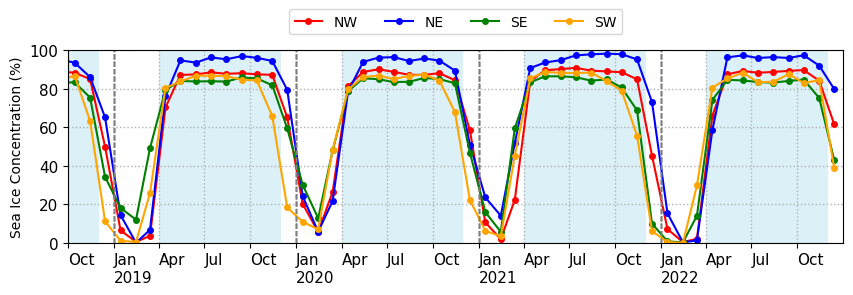

In [28]:
colors = ["red", "blue", "green", "orange"]
plt.figure(figsize = (10, 2.5), dpi = 100)
for i in range(0, len(roi_name)):
    
    # Monthly & daily sampling
    df_data = data[roi_name[i]] 
    df_daily = df_data.groupby(by = "date_num", as_index = False).mean()
    df_month = df_data.groupby(by = "month_num", as_index = False).mean()

    df_daily['date_str'] = df_daily['date_num'].astype(str)
    df_daily['datetime'] = pd.to_datetime(df_daily['date_str'], format = "%Y%m%d")
    df_month['month_str'] = df_month['month_num'].astype(str)
    df_month['datetime_mon'] = pd.to_datetime(df_month['month_str'], format = "%Y%m%d")

    field = "FRSEAICE"
    
#     plt.plot(df_daily['datetime'], df_daily[field], color = colors[i])
    plt.plot(df_month['datetime_mon'], df_month[field]*100, marker = 'o', ms = 4, color = colors[i], label = roi_name[i])
    # plt.plot(df1['date'], df1['v10'])
    # plt.ylim(-10, 10)
    
    for year in [2018, 2019, 2020, 2021, 2022]:
        plt.axvline(dt.datetime(year, 1, 1), color = 'grey', ls = "--", lw = 1.0)
        plt.axvspan(dt.datetime(year, 4, 1), dt.datetime(year, 12, 1), color = 'skyblue', alpha = 0.08, lw = 0)

# plt.axvline(dt.datetime(2021, 1, 1), color = 'k', ls = "--", lw = 1.0)
plt.legend(bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol = 4)
plt.grid(ls = ":", lw = 1)
plt.xticks(date_ticks, date_labels, fontsize = 11, ha = "left")
plt.yticks(fontsize = 11)
# plt.yscale('log')
plt.xlim(dt.datetime(2018, 10, 1), dt.datetime(2023,1,1))
plt.ylim(0, 100)
plt.ylabel("Sea Ice Concentration (%)")

Text(0, 0.5, 'Wind speed (m/s)')

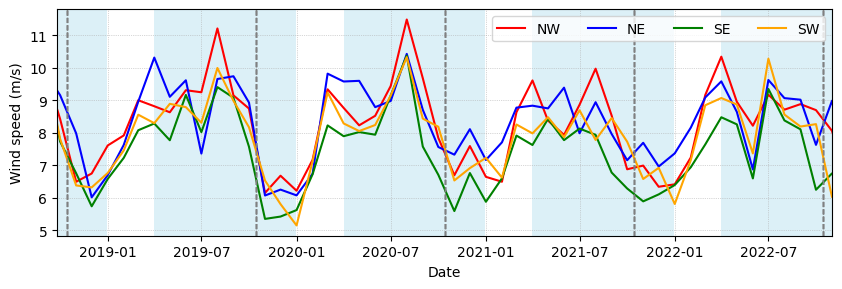

In [207]:
colors = ["red", "blue", "green", "orange"]
plt.figure(figsize = (10, 3), dpi = 100)
for i in range(0, len(roi_name)):
    
    # Monthly & daily sampling
    df_data = data[roi_name[i]] 
    df_daily = df_data.groupby(by = "date_num", as_index = False).mean()
    df_month = df_data.groupby(by = "month_num", as_index = False).mean()

    df_daily['date_str'] = df_daily['date_num'].astype(str)
    df_daily['datetime'] = pd.to_datetime(df_daily['date_str'], format = "%Y%m%d")
    df_month['month_str'] = df_month['month_num'].astype(str)
    df_month['datetime_mon'] = pd.to_datetime(df_month['month_str'], format = "%Y%m%d")

    field = "SPEED"
    
#     plt.plot(df_daily['datetime'], df_daily[field], color = colors[i])
    plt.plot(df_month['datetime_mon'], df_month[field], color = colors[i], label = roi_name[i])
    # plt.plot(df1['date'], df1['v10'])
    # plt.ylim(-10, 10)
    
    for year in [2018, 2019, 2020, 2021, 2022]:
        plt.axvline(dt.datetime(year, 10, 14), color = 'grey', ls = "--", lw = 1.0)
        plt.axvspan(dt.datetime(year, 4, 1), dt.datetime(year, 12, 31), color = 'skyblue', alpha = 0.08, lw = 0)

# plt.axhline(0, color = 'k', ls = ":", lw = 1.0)
plt.grid(ls = ":", lw = 0.5)
plt.xlim(dt.datetime(2018, 9, 25), dt.datetime(2022, 11, 1))
plt.legend(ncol = 4)
plt.xlabel("Date")
plt.ylabel("Wind speed (m/s)")

Text(0, 0.5, 'Maximum wind speed (m/s)')

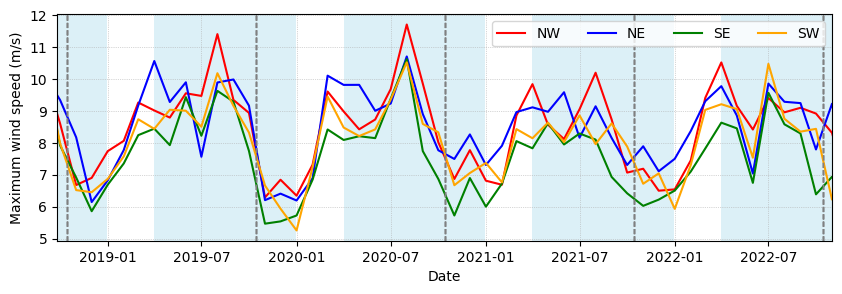

In [210]:
colors = ["red", "blue", "green", "orange"]
plt.figure(figsize = (10, 3), dpi = 100)
for i in range(0, len(roi_name)):
    
    # Monthly & daily sampling
    df_data = data[roi_name[i]] 
    df_daily = df_data.groupby(by = "date_num", as_index = False).mean()
    df_month = df_data.groupby(by = "month_num", as_index = False).mean()

    df_daily['date_str'] = df_daily['date_num'].astype(str)
    df_daily['datetime'] = pd.to_datetime(df_daily['date_str'], format = "%Y%m%d")
    df_month['month_str'] = df_month['month_num'].astype(str)
    df_month['datetime_mon'] = pd.to_datetime(df_month['month_str'], format = "%Y%m%d")

    field = "SPEEDMAX"
    
#     plt.plot(df_daily['datetime'], df_daily[field], color = colors[i])
    plt.plot(df_month['datetime_mon'], df_month[field], color = colors[i], label = roi_name[i])
    # plt.plot(df1['date'], df1['v10'])
    # plt.ylim(-10, 10)
    
    for year in [2018, 2019, 2020, 2021, 2022]:
        plt.axvline(dt.datetime(year, 10, 14), color = 'grey', ls = "--", lw = 1.0)
        plt.axvspan(dt.datetime(year, 4, 1), dt.datetime(year, 12, 31), color = 'skyblue', alpha = 0.08, lw = 0)

# plt.axhline(0, color = 'k', ls = ":", lw = 1.0)
plt.grid(ls = ":", lw = 0.5)
plt.xlim(dt.datetime(2018, 9, 25), dt.datetime(2022, 11, 1))
plt.legend(ncol = 4)
plt.xlabel("Date")
plt.ylabel("Maximum wind speed (m/s)")

Text(0, 0.5, 'Total latent energy flux $(W/m^2)$')

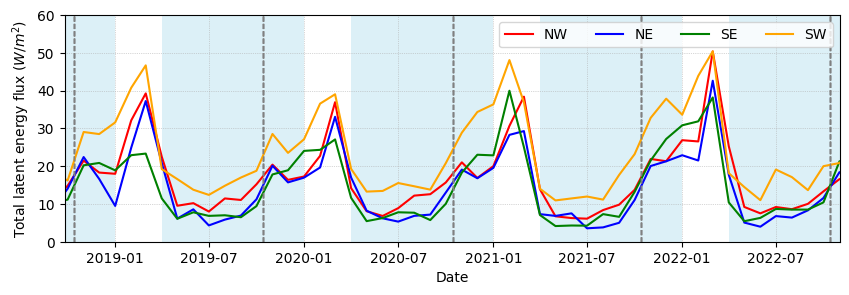

In [218]:
colors = ["red", "blue", "green", "orange"]
plt.figure(figsize = (10, 3), dpi = 100)
for i in range(0, len(roi_name)):
    
    # Monthly & daily sampling
    df_data = data[roi_name[i]] 
    df_daily = df_data.groupby(by = "date_num", as_index = False).mean()
    df_month = df_data.groupby(by = "month_num", as_index = False).mean()

    df_daily['date_str'] = df_daily['date_num'].astype(str)
    df_daily['datetime'] = pd.to_datetime(df_daily['date_str'], format = "%Y%m%d")
    df_month['month_str'] = df_month['month_num'].astype(str)
    df_month['datetime_mon'] = pd.to_datetime(df_month['month_str'], format = "%Y%m%d")

    field = "EFLUX"
    
#     plt.plot(df_daily['datetime'], df_daily[field], color = colors[i])
    plt.plot(df_month['datetime_mon'], df_month[field], color = colors[i], label = roi_name[i])
    # plt.plot(df1['date'], df1['v10'])
    # plt.ylim(-10, 10)
    
    for year in [2018, 2019, 2020, 2021, 2022]:
        plt.axvline(dt.datetime(year, 10, 14), color = 'grey', ls = "--", lw = 1.0)
        plt.axvspan(dt.datetime(year, 4, 1), dt.datetime(year, 12, 31), color = 'skyblue', alpha = 0.08, lw = 0)

# plt.axhline(0, color = 'k', ls = ":", lw = 1.0)
plt.grid(ls = ":", lw = 0.5)
plt.xlim(dt.datetime(2018, 9, 25), dt.datetime(2022, 11, 1))
plt.legend(ncol = 4)
plt.ylim(0, 60)
plt.xlabel("Date")
plt.ylabel("Total latent energy flux $(W/m^2)$")

In [ ]:
colors = ["red", "blue", "green", "orange"]
plt.figure(figsize = (10, 3), dpi = 100)
for i in range(0, len(roi_name)):
    
    # Monthly & daily sampling
    df_data = data[roi_name[i]] 
    df_daily = df_data.groupby(by = "date_num", as_index = False).mean()
    df_month = df_data.groupby(by = "month_num", as_index = False).mean()

    df_daily['date_str'] = df_daily['date_num'].astype(str)
    df_daily['datetime'] = pd.to_datetime(df_daily['date_str'], format = "%Y%m%d")
    df_month['month_str'] = df_month['month_num'].astype(str)
    df_month['datetime_mon'] = pd.to_datetime(df_month['month_str'], format = "%Y%m%d")

    field = "SPEED"
    
#     plt.plot(df_daily['datetime'], df_daily[field], color = colors[i])
    plt.plot(df_month['datetime_mon'], df_month[field], color = colors[i], label = roi_name[i])
    # plt.plot(df1['date'], df1['v10'])
    # plt.ylim(-10, 10)
    
    for year in [2018, 2019, 2020, 2021, 2022]:
        plt.axvline(dt.datetime(year, 10, 14), color = 'grey', ls = "--", lw = 1.0)
        plt.axvspan(dt.datetime(year, 4, 1), dt.datetime(year, 12, 31), color = 'skyblue', alpha = 0.08, lw = 0)

# plt.axhline(0, color = 'k', ls = ":", lw = 1.0)
plt.grid(ls = ":", lw = 0.5)
plt.xlim(dt.datetime(2018, 9, 25), dt.datetime(2022, 11, 1))
plt.legend(ncol = 4)
plt.xlabel("Date")
plt.ylabel("V-component wind (m/s)")

In [135]:
df1 = pd.read_csv("F:\\2022_Ross\\Time_series\\ERA5_TS_{0}.csv".format("SE"))
df1['date'] = pd.to_datetime(df1['date'])

In [9]:
df

,date,CDH,EFLUX,FRSEAICE,SPEEDMAX,SPEED,year,month,day,date_num,month_num,date_str,month_str
0,2019-04-01 00:00:00,0.017376,58.174401,0.172596,14.335464,14.104041,2019,4,1,20190401,20190401,20190401,20190401
1,2019-04-01 01:00:00,0.017312,59.592545,0.174402,14.146374,13.890858,2019,4,1,20190401,20190401,20190401,20190401
2,2019-04-01 02:00:00,0.017220,60.975725,0.176205,13.948187,13.683769,2019,4,1,20190401,20190401,20190401,20190401
3,2019-04-01 03:00:00,0.017022,61.946797,0.178005,13.699092,13.351666,2019,4,1,20190401,20190401,20190401,20190401
4,2019-04-01 04:00:00,0.016692,62.490925,0.179802,13.251513,12.914490,2019,4,1,20190401,20190401,20190401,20190401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,2019-09-30 19:00:00,0.010868,9.966690,0.875342,8.065737,7.809712,2019,9,30,20190930,20190901,20190930,20190901
4388,2019-09-30 20:00:00,0.011154,11.042767,0.876490,7.763975,7.505304,2019,9,30,20190930,20190901,20190930,20190901
4389,2019-09-30 21:00:00,0.011415,12.607396,0.877649,7.535816,7.310464,2019,9,30,20190930,20190901,20190930,20190901
4390,2019-09-30 22:00:00,0.011512,14.288951,0.878800,7.356434,7.135713,2019,9,30,20190930,20190901,20190930,20190901


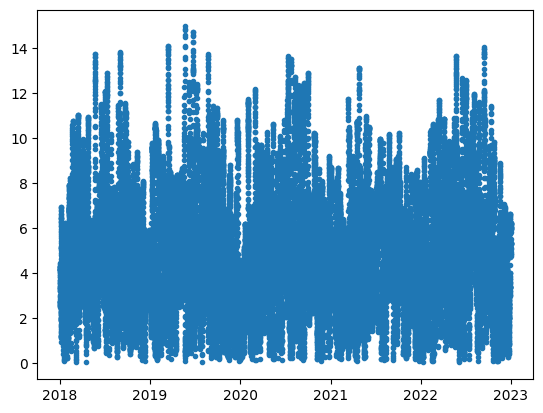

In [36]:
plt.plot(df['date'], df['wind'], '.')

In [18]:
df_count

,SW
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0
10,0.0
11,0.0


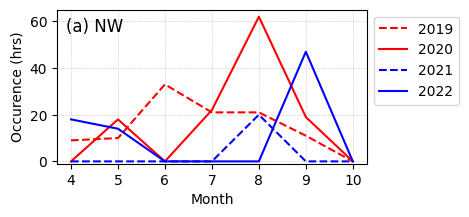

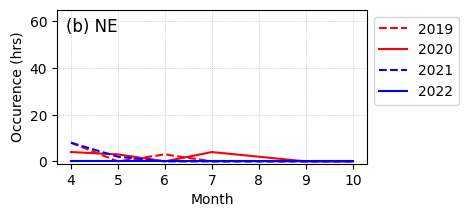

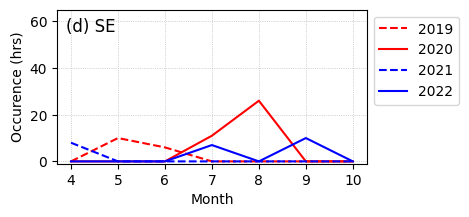

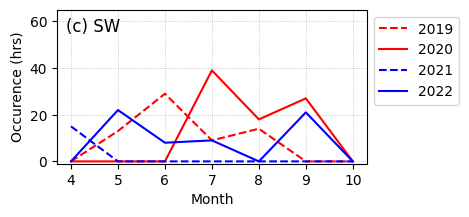

In [11]:
field = 'wind'
vmin = {'PS': 0, 'wind': 12}
vmax = {'PS': 95000, 'wind': 50}
lss = ["--", "-", "--", "-"]
colors = ["r", "r", "b", "b"]
labels = ["(a)", "(b)", "(d)", "(c)"]
L = 0

for roi in roi_name:
    plt.figure(figsize = (4,2), dpi =100)
    for i, y in enumerate([2019, 2020, 2021, 2022]):
        df_count = pd.DataFrame({})
        df = data[roi]
        months = [4,5,6,7,8,9,10]
        for m in months:
            array = df.loc[(df['year']==y) & (df['month']==m), field].values
            count = len(np.where((array >= vmin[field]) & (array <= vmax[field]))[0])
            df_count.loc[m, roi] = count
            
        plt.plot(df_count[roi], label = y, ls = lss[i], color = colors[i])
    # plt.ylim(0, 70)
    plt.xticks(months)
    plt.annotate(f"{labels[L]} {roi}", xy=(0.03, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')
    plt.grid(ls = ":", lw=0.5)
    plt.xlabel("Month")
    plt.ylabel("Occurence (hrs)")
    plt.legend(bbox_to_anchor=(1,1), loc = "upper left")
    plt.ylim(-1, 65)
    plt.savefig(f"F:\\2022_Ross\\Figures_map\\Strong_wind_events_{roi}.png", bbox_inches = "tight")
    L += 1

In [14]:
'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

,NW,NE,SE,SW
2019,105.0,11.0,16.0,65.0
2020,121.0,13.0,37.0,84.0
2021,20.0,10.0,8.0,15.0
2022,79.0,0.0,17.0,60.0


In [5]:
field = 'wind'
vmin = {'PS': 0, 'wind': 12}
vmax = {'PS': 95000, 'wind': 50}

df_count = pd.DataFrame({})

for roi in roi_name:
    for y in [2019, 2020, 2021, 2022]:
        df = data[roi]
        df = df[(df['year']==y) & (df['month']>=4)  & (df['month']<10)].reset_index(drop=True)

        array = df[field].values
        count = len(np.where((array >= vmin[field]) & (array <= vmax[field]))[0])
        df_count.loc[y, roi] = count

KeyError: 'wind'

<AxesSubplot:>

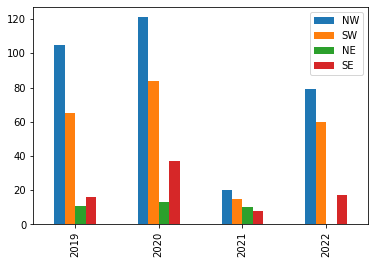

In [86]:
df_count.plot.bar()

In [50]:
plt.bar(df_count)

TypeError: bar() missing 1 required positional argument: 'height'

In [31]:
df_NW = data['NW']
df_SW = data['SW']
df_NE = data['NE']
df_SE = data['SE']

(18993.0, 19327.0)

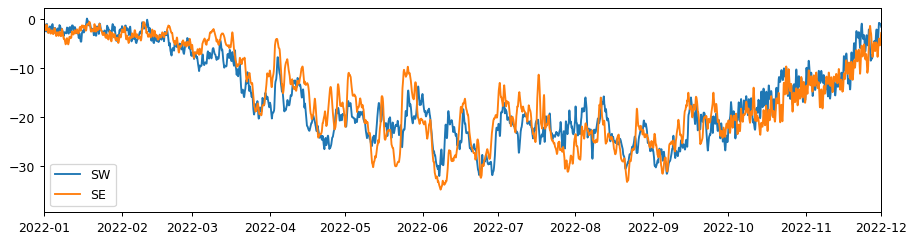

In [205]:
field = "T2M"
plt.figure(figsize = (12, 3), dpi = 90)
plt.plot(df_SW['date'], df_SW[field]-273.15, label = "SW")
plt.plot(df_SE['date'], df_SE[field]-273.15, label = "SE")
# plt.plot(df_NW['date'], df_NW[field], label = "SW")
# plt.plot(df_NE['date'], df_NE[field], label = "SE")
# plt.axhline(10, color = "k", ls = "--")
y = 2022
plt.legend()
plt.xlim(dt.datetime(y, 1, 1), dt.datetime(y, 12, 1))

(17987.0, 18201.0)

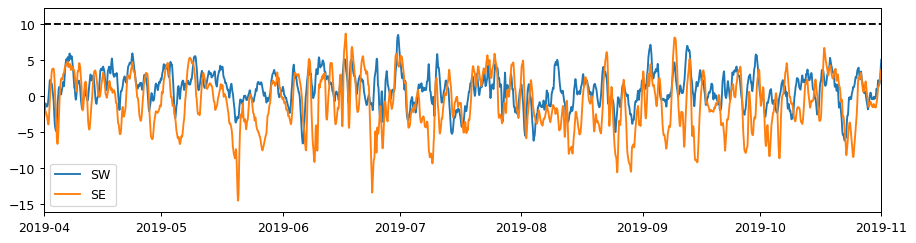

In [103]:
field = "U2M"
plt.figure(figsize = (12, 3), dpi = 90)
plt.plot(df_SW['date'], df_SW[field], label = "SW")
plt.plot(df_SE['date'], df_SE[field], label = "SE")
# plt.plot(df_NW['date'], df_NW[field], label = "SW")
# plt.plot(df_NE['date'], df_NE[field], label = "SE")
plt.axhline(10, color = "k", ls = "--")
y = 2019
plt.legend()
plt.xlim(dt.datetime(y, 4, 1), dt.datetime(y, 11, 1))

(18475.0, 18536.0)

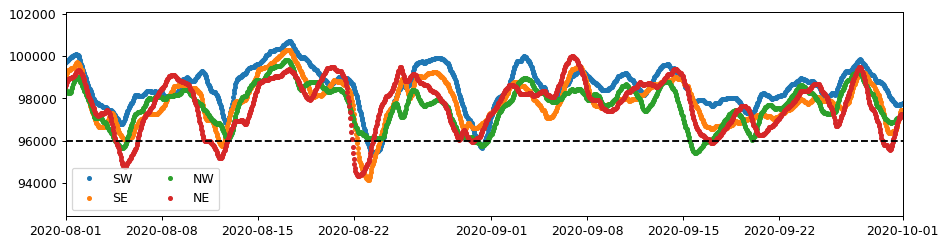

In [38]:
field = "PS"
plt.figure(figsize = (12, 3), dpi = 90)
plt.plot(df_SW['date'], df_SW[field], '.', label = "SW")
plt.plot(df_SE['date'], df_SE[field], '.', label = "SE")
plt.plot(df_NW['date'], df_NW[field], '.', label = "NW")
plt.plot(df_NE['date'], df_NE[field], '.', label = "NE")
plt.axhline(96000, color = "k", ls = "--")
plt.legend(ncol=2)
y = 2020
plt.xlim(dt.datetime(y, 8, 1), dt.datetime(y, 10, 1))

(17987.0, 18201.0)

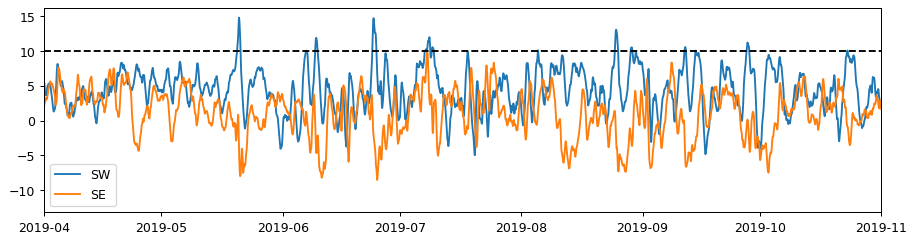

In [121]:
field = "V2M"
plt.figure(figsize = (12, 3), dpi = 90)
plt.plot(df_SW['date'], df_SW[field], label = "SW")
plt.plot(df_SE['date'], df_SE[field], label = "SE")
plt.axhline(10, color = "k", ls = "--")
plt.legend()
y = 2019
plt.xlim(dt.datetime(y, 4, 1), dt.datetime(y, 11, 1))

(17987.0, 18201.0)

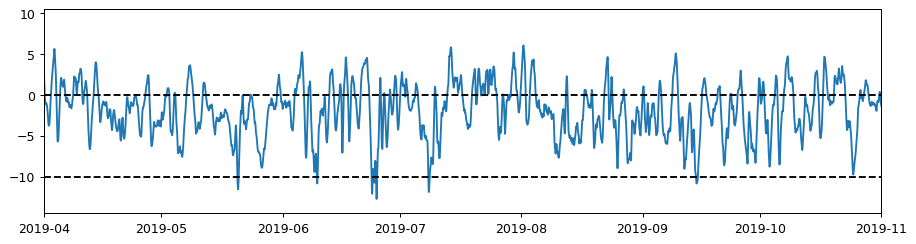

In [195]:
field = "U2M"
plt.figure(figsize = (12, 3), dpi = 90)
plt.plot(df_SW['date'], df_SE[field]-df_SW[field])
# plt.plot(df_SE['date'], df_SE[field])
plt.axhline(0, color = "k", ls = "--")
plt.axhline(-10, color = "k", ls = "--")
y = 2019
plt.xlim(dt.datetime(y, 4, 1), dt.datetime(y, 11, 1))

(17532.0, 18262.0)

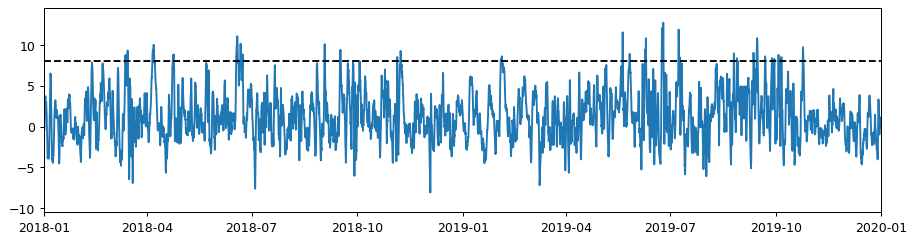

In [121]:
field = "U2M"
plt.figure(figsize = (12, 3), dpi = 90)
plt.plot(df_SW['date'], df_SW[field] - df_SE[field])
# plt.plot(df_SE['date'], df_SE[field])
plt.axhline(8, color = "k", ls = "--")
y = 2018
plt.xlim(dt.datetime(y, 4, 1), dt.datetime(y+2, 11, 1))

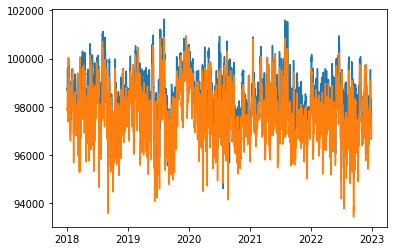

In [184]:
plt.plot(df_SW['date'], df_SW['PS'])
plt.plot(df_SE['date'], df_SE['PS'])

In [19]:
u10 = ee.ImageCollection("NASA/GSFC/MERRA/slv/2").filterDate("2019-10-01", "2019-10-02").select("U2M")
u10.size().getInfo()

24

In [14]:
dti = pd.date_range("2018-10-01", "2022-11-01", freq="D")
dti

DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08',
               '2018-10-09', '2018-10-10',
               ...
               '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26',
               '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30',
               '2022-10-31', '2022-11-01'],
              dtype='datetime64[ns]', length=1493, freq='D')

In [17]:
visWind = {'min': -10, 'max': 10, 'palette': ['#FFFFFF', '#FFFF71', '#DEFF00', '#9EFF00', '#77B038', '#007E55', '#005F51','#004B51', '#013A7B', '#023AAD']};

Map = geemap.Map()
Map.addLayer(u10, visWind, "Layer")
Map

dict_keys(['longitude', 'latitude', 'time', 'u10', 'v10', 't2m', 'msl', 'siconc', 'sp'])


In [3]:
try: nc.close()  # just to be safe, make sure dataset is not already open.
except: pass
    
ncname = 'F:\\2022_Ross\\ERA5\\ERA5_2018-2022.nc'
nc = netCDF4.Dataset(ncname, 'r')
print(nc.variables.keys())

dict_keys(['longitude', 'latitude', 'expver', 'time', 'u10', 'v10', 't2m', 'mdww', 'msl', 'mwd', 'mwp', 'siconc', 'swh', 'shts', 'asn', 'rsn', 'sd', 'es', 'sf', 'slhf', 'ssr', 'sp', 'tcc', 'tp'])


In [4]:
try: nc.close()  # just to be safe, make sure dataset is not already open.
except: pass
    
ncname = 'F:\\2022_Ross\\ERA5\\ERA5_2018-2022.nc'
nc = netCDF4.Dataset(ncname, 'r')
print(nc.variables.keys())

times = nc.variables['time']
times = num2date(times[:], units = times.units)

hours = np.array(nc.variables['time']).astype(float)
time_era = []

for i in range(0, len(hours)):
    time_era.append(dt.datetime(1900, 1, 1) + dt.timedelta(hours = hours[i]))

df = pd.DataFrame()
df['date'] = time_era

lat0 = np.array(nc.variables['latitude'])
lon0 = np.array(nc.variables['longitude'])

lon = np.meshgrid(lon0, lat0)[0]
lat = np.meshgrid(lon0, lat0)[1]

NW = (lat>-74) & (lat<-70) & ((lon<-172) | (lon>168))
SW = (lat>-78) & (lat<-74) & ((lon<-172) | (lon>168))
SE = (lat>-78) & (lat<-74) & ((lon<-150) & (lon>-172))
NE = (lat>-74) & (lat<-70) & ((lon<-150) & (lon>-172))

### ============================================================

for region in ["NW", "SW", "NE", "SE"]:

    if region == "NW":
        roi = NW
    elif region == "SW":
        roi = SW
    elif region == "NE":
        roi = NE
    elif region == "SE":
        roi = SE

    fields = ['u10', 'v10', 't2m', 'mdww', 'msl', 'mwd', 'mwp', 'siconc', 'swh', 'shts', 'asn', 
              'rsn', 'sd', 'es', 'sf', 'slhf', 'ssr', 'sp', 'tcc', 'tp']

    for i in tqdm(range(0, len(times))):
        for field in fields:
            if field == 'wind':
                u10 = (np.array(nc.variables["u10"]))[i, 0, :, :]
                v10 = (np.array(nc.variables["v10"]))[i, 0, :, :]     
                data = (u10**2 + v10**2)**0.5
            else:
                data = (np.array(nc.variables[field]))[i, 0, :, :]
            data[data == -32767] = np.nan
            df.loc[i, field] = np.nanmean(data[roi])
    
    print(region)
    df.to_csv("F:\\2022_Ross\\Time_series\\ERA5_TS2_{0}.csv".format(region))

try: nc.close()  # just to be safe, make sure dataset is not already open.
except: pass

dict_keys(['longitude', 'latitude', 'expver', 'time', 'u10', 'v10', 't2m', 'mdww', 'msl', 'mwd', 'mwp', 'siconc', 'swh', 'shts', 'asn', 'rsn', 'sd', 'es', 'sf', 'slhf', 'ssr', 'sp', 'tcc', 'tp'])


100%|██████████| 60/60 [37:43<00:00, 37.72s/it]


NW


100%|██████████| 60/60 [25:24<00:00, 25.41s/it]


SW


100%|██████████| 60/60 [21:56<00:00, 21.94s/it]


NE


100%|██████████| 60/60 [30:00<00:00, 30.01s/it]


SE


Text(0, 0.5, 'U10 (m/s)')

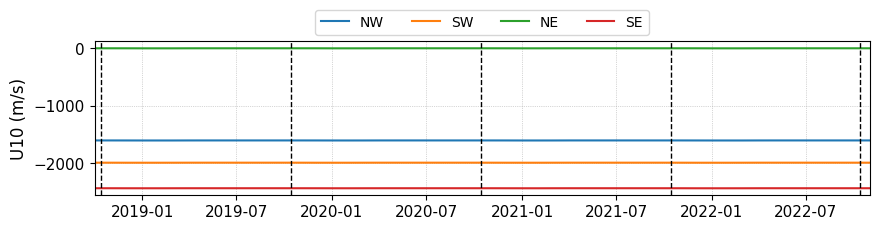

In [7]:
import datetime as dt
plt.figure(figsize = (10,2), dpi = 100)

field = 'siconc'
for region in ["NW", "SW", "NE", "SE"]:
    df1 = pd.read_csv("F:\\2022_Ross\\Time_series\\ERA5_TS_{0}.csv".format(region))
    df1['date'] = pd.to_datetime(df1['date'])
    df1 = df1.drop(57, axis = 0)
    plt.plot(df1['date'], df1[field], label = region)    

for year in [2018, 2019, 2020, 2021, 2022]:
    plt.axvline(dt.datetime(year, 10, 14), color = 'k', ls = "--", lw = 1.0)

plt.xlim(dt.datetime(2018, 10, 1), dt.datetime(2022, 11, 1))
plt.legend(bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol = 4)
# plt.ylim(0,10)
plt.grid(ls = ":", lw = 0.5)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.ylabel("U10 (m/s)", fontsize = 12)

Text(0, 0.5, 'U10 (m/s)')

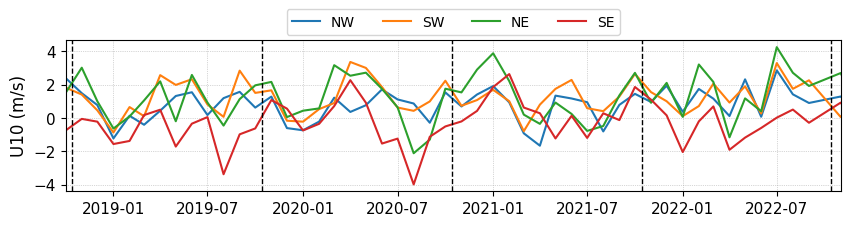

In [94]:
plt.figure(figsize = (10,2), dpi = 100)

field = 'u10'
for region in ["NW", "SW", "NE", "SE"]:
    df1 = pd.read_csv("F:\\2022_Ross\\Time_series\\ERA5_TS_{0}.csv".format(region))
    df1['date'] = pd.to_datetime(df1['date'])
    df1 = df1.drop(57, axis = 0)
    plt.plot(df1['date'], df1[field], label = region)    

for year in [2018, 2019, 2020, 2021, 2022]:
    plt.axvline(dt.datetime(year, 10, 14), color = 'k', ls = "--", lw = 1.0)

plt.xlim(dt.datetime(2018, 10, 1), dt.datetime(2022, 11, 1))
plt.legend(bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol = 4)
# plt.ylim(0,10)
plt.grid(ls = ":", lw = 0.5)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.ylabel("U10 (m/s)", fontsize = 12)

Text(0, 0.5, 'Wind (m/s)')

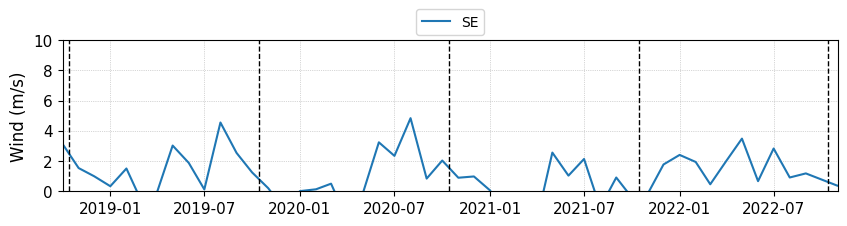

In [91]:
plt.figure(figsize = (10,2), dpi = 100)

field = 'u10'

df1 = pd.read_csv("F:\\2022_Ross\\Time_series\\ERA5_TS_NW.csv")
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.drop(57, axis = 0)
df2 = pd.read_csv("F:\\2022_Ross\\Time_series\\ERA5_TS_SE.csv")
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.drop(57, axis = 0)
plt.plot(df1['date'], df1[field] - df2[field], label = region)    

for year in [2018, 2019, 2020, 2021, 2022]:
    plt.axvline(dt.datetime(year, 10, 14), color = 'k', ls = "--", lw = 1.0)

plt.xlim(dt.datetime(2018, 10, 1), dt.datetime(2022, 11, 1))
plt.legend(bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol = 4)
plt.ylim(0,10)
plt.grid(ls = ":", lw = 0.5)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.ylabel("Wind (m/s)", fontsize = 12)

Text(0, 0.5, 'V10 (m/s)')

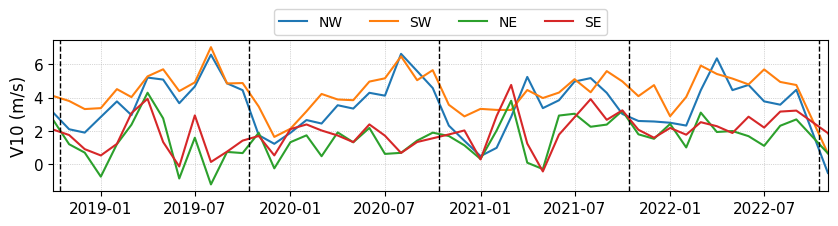

In [93]:
plt.figure(figsize = (10,2), dpi = 100)

field = 'v10'
for region in ["NW", "SW", "NE", "SE"]:
    df1 = pd.read_csv("F:\\2022_Ross\\Time_series\\ERA5_TS_{0}.csv".format(region))
    df1['date'] = pd.to_datetime(df1['date'])
    df1 = df1.drop(57, axis = 0)
    plt.plot(df1['date'], df1[field], label = region)    

for year in [2018, 2019, 2020, 2021, 2022]:
    plt.axvline(dt.datetime(year, 10, 14), color = 'k', ls = "--", lw = 1.0)

plt.xlim(dt.datetime(2018, 10, 1), dt.datetime(2022, 11, 1))
plt.legend(bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol = 4)
# plt.ylim(0,10)
plt.grid(ls = ":", lw = 0.5)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.ylabel("V10 (m/s)", fontsize = 12)

Text(0, 0.5, 'Temperature (K)')

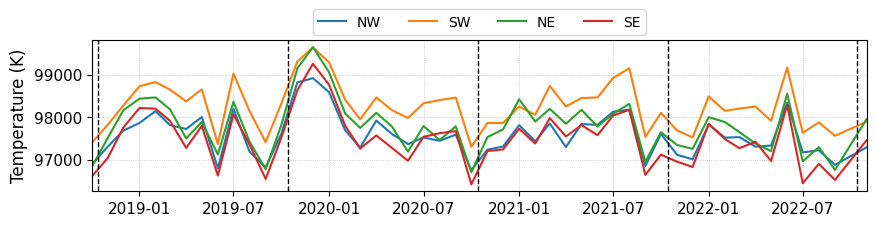

In [92]:
plt.figure(figsize = (10,2), dpi = 100)

field = "sp"
for region in ["NW", "SW", "NE", "SE"]:
    df1 = pd.read_csv("F:\\2022_Ross\\Time_series\\ERA5_TS_{0}.csv".format(region))
    df1['date'] = pd.to_datetime(df1['date'])
    df1 = df1.drop(57, axis = 0)
    plt.plot(df1['date'], df1[field], label = region)    

for year in [2018, 2019, 2020, 2021, 2022]:
    plt.axvline(dt.datetime(year, 10, 14), color = 'k', ls = "--", lw = 1.0)

plt.xlim(dt.datetime(2018, 10, 1), dt.datetime(2022, 11, 1))
plt.legend(bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol = 4)
# plt.ylim(0,10)
plt.grid(ls = ":", lw = 0.5)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.ylabel("Temperature (K)", fontsize = 12)

In [10]:
df1.drop(57, axis = 0)

,Unnamed: 0,date,u10,v10,wind,t2m,mdww,mwd,mwp,siconc,swh,rsn,sd,ssr,slhf,sp,tcc,tp
0,0,2018-01-01,-0.764390,0.962587,1.458450,270.782307,-32767.0,-32767.0,-32767.0,-2435.492015,-32767.0,116.580416,0.829018,1.802602e+07,-2.119599e+06,98082.116950,0.778949,0.000807
1,1,2018-02-01,-2.055668,1.440197,2.812389,269.612292,-32767.0,-32767.0,-32767.0,-2435.543676,-32767.0,116.580416,0.829018,1.048108e+07,-3.004249e+06,97729.769499,0.834809,0.001954
2,2,2018-03-01,-0.537516,3.167052,3.744964,264.272743,-32767.0,-32767.0,-32767.0,-2435.276868,-32767.0,116.580416,0.829018,3.117712e+06,-3.520451e+06,97431.529271,0.918268,0.002103
3,3,2018-04-01,0.383965,1.889572,2.396833,258.971818,-32767.0,-32767.0,-32767.0,-2434.770427,-32767.0,116.580416,0.829018,1.819017e+05,-1.074165e+06,98102.230998,0.941699,0.001788
4,4,2018-05-01,-0.083953,2.465061,2.616368,249.764671,-32767.0,-32767.0,-32767.0,-2434.679681,-32767.0,116.580416,0.829018,1.862645e-09,-3.500992e+05,97880.256726,0.924526,0.000724
5,5,2018-06-01,-2.187519,2.711288,3.961367,251.906613,-32767.0,-32767.0,-32767.0,-2434.696289,-32767.0,116.580416,0.829018,1.862645e-09,-4.748978e+05,97754.605471,0.896229,0.000643
6,6,2018-07-01,0.819334,2.287732,3.016673,251.671764,-32767.0,-32767.0,-32767.0,-2434.693304,-32767.0,116.580416,0.829018,1.862645e-09,-4.988849e+05,97610.765750,0.930927,0.001122
7,7,2018-08-01,0.561206,2.344145,2.565833,246.029066,-32767.0,-32767.0,-32767.0,-2434.680304,-32767.0,116.580416,0.829018,5.211690e+04,-3.617176e+05,98525.305291,0.870523,0.000348
8,8,2018-09-01,-0.375418,0.321079,1.724323,252.472357,-32767.0,-32767.0,-32767.0,-2434.699374,-32767.0,116.580416,0.829018,7.556311e+05,-7.734900e+05,96744.819393,0.937821,0.001846
9,9,2018-10-01,-0.746434,2.091103,2.707268,258.968156,-32767.0,-32767.0,-32767.0,-2434.698730,-32767.0,116.580416,0.829018,2.730969e+06,-6.927998e+05,96596.798553,0.878737,0.000738


## Draw maps of ERA5

In [36]:
try: nc.close()  # just to be safe, make sure dataset is not already open.
except: pass
    
ncname = 'F:\\2022_Ross\\ERA5\\ERA5_2018-2022.nc'
nc = netCDF4.Dataset(ncname, 'r')
keys = nc.variables.keys()

print(keys)

times = nc.variables['time']
times = num2date(times[:], units = times.units)

hours = np.array(nc.variables['time']).astype(float)
time_era = []

for i in range(0, len(hours)):
    time_era.append(dt.datetime(1900, 1, 1) + dt.timedelta(hours = hours[i]))

df = pd.DataFrame()
df['date'] = time_era

lat0 = np.array(nc.variables['latitude'])
lon0 = np.array(nc.variables['longitude'])

lon = np.meshgrid(lon0, lat0)[0]
lat = np.meshgrid(lon0, lat0)[1]

xx, yy = transform(Proj("EPSG:4326"), Proj("EPSG:3412"), lat, lon) 

NW = (lat>-74) & (lat<-70) & ((lon<-172) | (lon>168))
SW = (lat>-78) & (lat<-74) & ((lon<-172) | (lon>168))
SE = (lat>-78) & (lat<-74) & ((lon<-150) & (lon>-172))
NE = (lat>-74) & (lat<-70) & ((lon<-150) & (lon>-172))

u10 = np.array(nc.variables['u10'])
v10 = np.array(nc.variables['v10'])
wind = (u10**2 + v10**2)**0.5

dict_keys(['longitude', 'latitude', 'expver', 'time', 'u10', 'v10', 't2m', 'mdww', 'msl', 'mwd', 'mwp', 'siconc', 'swh', 'shts', 'asn', 'rsn', 'sd', 'es', 'sf', 'slhf', 'ssr', 'sp', 'tcc', 'tp'])


In [42]:
from pyproj import Proj, transform
inProj  = Proj("+init=EPSG:4326")
outProj = Proj("+init=EPSG:3031")

offset = 0.5

lons = np.concatenate((np.arange(168, 181), np.arange(-180, -171)))
lats = np.concatenate((np.ones(len(lons))*(-70+offset), np.ones(len(lons))*(-74+offset), np.array([-70+offset])))
lons = np.concatenate((lons, lons[::-1], np.array([168])))

NW_x, NW_y = transform(inProj,outProj,lons,lats)

lons = (np.arange(-172, -149))
lats = np.concatenate((np.ones(len(lons))*(-70+offset), np.ones(len(lons))*(-74+offset), np.array([-70+offset])))
lons = np.concatenate((lons, lons[::-1], np.array([-172])))

NE_x, NE_y = transform(inProj,outProj,lons,lats)

lons = np.concatenate((np.arange(162, 181), np.arange(-180, -171)))
lats = np.concatenate((np.ones(len(lons))*(-74+offset), np.ones(len(lons))*(-78+offset), np.array([-74+offset])))
lons = np.concatenate((lons, lons[::-1], np.array([162])))

SW_x, SW_y = transform(inProj,outProj,lons,lats)

lons = (np.arange(-172, -149))
lats = np.concatenate((np.ones(len(lons))*(-74+offset), np.ones(len(lons))*(-78+offset), np.array([-74+offset])))
lons = np.concatenate((lons, lons[::-1], np.array([-172])))

SE_x, SE_y = transform(inProj,outProj,lons,lats)

In [57]:
data

array([[-16382.86517964, -16382.86124345, -16382.86286423, ...,
        -16382.88763907, -16382.87907207, -16382.86957891],
       [-16382.90755156, -16382.90708848, -16382.90847772, ...,
        -16382.93047407, -16382.92190707, -16382.91287699],
       [-16382.95177581, -16382.95339659, -16382.95594354, ...,
        -16382.97261446, -16382.96520516, -16382.95849048],
       ...,
       [-16380.46896634, -16380.46433553, -16380.45993626, ...,
        -16380.4823957 , -16380.47799643, -16380.47336561],
       [-16380.50763362, -16380.50531821, -16380.50323435, ...,
        -16380.51434829, -16380.51226443, -16380.50994902],
       [-16383.50376851, -16383.50376851, -16383.50376851, ...,
        -16383.50376851, -16383.50376851, -16383.50376851]])

In [66]:
np.shape(data)

(1440,)

2018-07-01 00:00:00
2019-07-01 00:00:00
2020-07-01 00:00:00
2021-07-01 00:00:00
2022-07-01 00:00:00


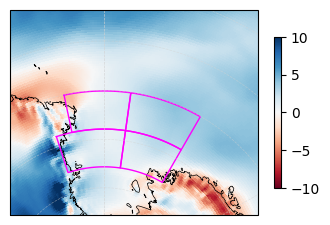

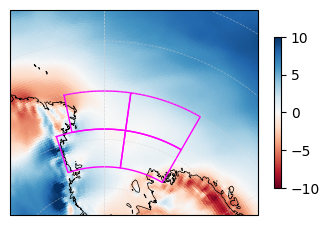

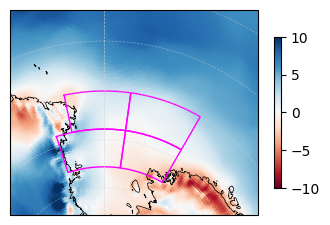

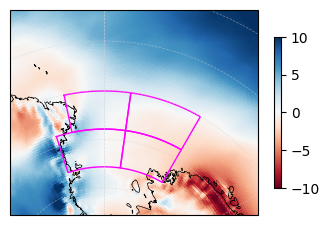

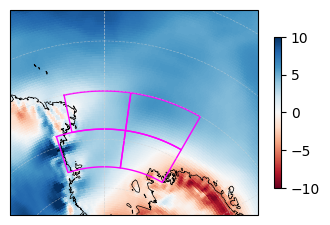

In [82]:
for i in range(6, len(time_era), 12):
    print(time_era[i])

    fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})

    # lons = np.arange(-180, -89)

    field = 'u10'
    # data = np.nanmean((np.array(nc.variables[field]))[i, 0, :, :], axis = 0)

    data = np.array(nc.variables[field])[i, 0, :, :]

    vmin, vmax = {}, {};
    vmin['siconc'] = 0.0; vmax['siconc'] = 1.0
    vmin['v10'] = -10; vmax['v10'] = 10
    vmin['u10'] = -10; vmax['u10'] = 10
    vmin['fb_mode2'] = 0.0; vmax['fb_mode2'] = 0.5
    vmin['fr_ridge'] = 0.0; vmax['fr_ridge'] = 10
    vmin['fb_mean'] = 0.0; vmax['fb_mean'] = 0.8
    vmin['fb_median'] = 0.0; vmax['fb_median'] = 0.8
    vmin['fb_std'] = 0.0; vmax['fb_std'] = 0.5
    vmin['fr_lead'] = 0.0; vmax['fr_lead'] = 0.02
    vmin['h_ridge_mean'] = 0.6; vmax['h_ridge_mean'] = 1.0

    pm = ax.pcolormesh(xx, yy, data, cmap = "RdBu", vmin = vmin[field], vmax = vmax[field])

    ax.coastlines('10m', linewidth = 0.5)

    ax.plot(NW_x, NW_y, lw=1, color = "magenta")
    ax.plot(NE_x, NE_y, lw=1, color = "magenta")
    ax.plot(SW_x, SW_y, lw=1, color = "magenta")
    ax.plot(SE_x, SE_y, lw=1, color = "magenta")

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.5, color='lightgrey', alpha=0.5, linestyle='--')

    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False

    xmin, xmax = ax.set_xlim(1100000, -1800000)
    ymin, ymax = ax.set_ylim(-800000, -3200000)

    plt.colorbar(pm, ax = ax, shrink = 0.5)

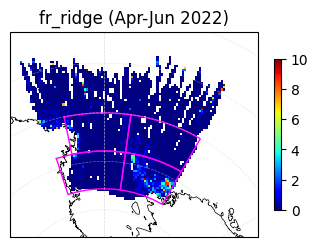

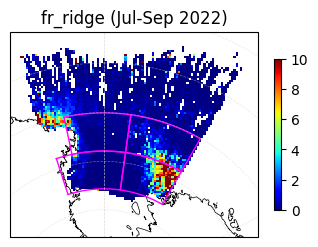

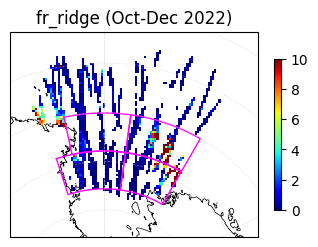

In [66]:
# Draw map ===========================================================

for i in range(0, len(time_era)):
    
    fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})

    lons = np.arange(-180, -89)
    
    field = 'wind'
    data = np.nanmean((np.array(nc.variables[field2]))[i, :, :], axis = 0)
    
    vmin, vmax = {}, {};
    vmin['fb_mode'] = 0.0; vmax['fb_mode'] = 0.5
    vmin['fb_mode1'] = 0.0; vmax['fb_mode1'] = 0.5
    vmin['fb_mode2'] = 0.0; vmax['fb_mode2'] = 0.5
    vmin['fr_ridge'] = 0.0; vmax['fr_ridge'] = 10
    vmin['fb_mean'] = 0.0; vmax['fb_mean'] = 0.8
    vmin['fb_median'] = 0.0; vmax['fb_median'] = 0.8
    vmin['fb_std'] = 0.0; vmax['fb_std'] = 0.5
    vmin['fr_lead'] = 0.0; vmax['fr_lead'] = 0.02
    vmin['h_ridge_mean'] = 0.6; vmax['h_ridge_mean'] = 1.0

    pm = ax.pcolormesh(xx, yy, data, cmap = "jet")
    
    ax.coastlines('10m', linewidth = 0.5)
    
    ax.plot(NW_x, NW_y, lw=1, color = "magenta")
    ax.plot(NE_x, NE_y, lw=1, color = "magenta")
    ax.plot(SW_x, SW_y, lw=1, color = "magenta")
    ax.plot(SE_x, SE_y, lw=1, color = "magenta")

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.5, color='lightgrey', alpha=0.5, linestyle='--')
    
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False

    xmin, xmax = ax.set_xlim(1100000, -1800000)
    ymin, ymax = ax.set_ylim(-800000, -3200000)
    
    ax.set_title("{0} ({1}-{2})".format(field2, date1[i].strftime("%b"), date2[i].strftime("%b %Y")),
                   fontsize = 12)
    
    plt.colorbar(pm, ax = ax, shrink = 0.5)
    plt.savefig("F:\\2022_Ross\\Figures_map\\{0}_{1}-{2}.png".format(field2, date1[i].strftime("%Y%m"), date2[i].strftime("%Y%m")),
               bbox_inches="tight")

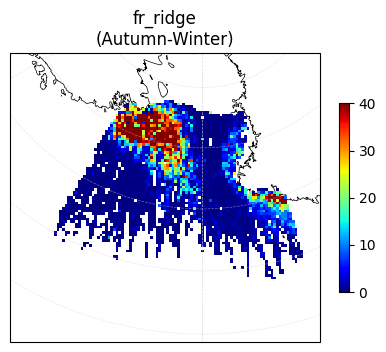

In [383]:
# Draw map ===========================================================

date1 = [dt.datetime(2020,3,1), dt.datetime(2020,9,1)]
date2 = [dt.datetime(2020,6,30), dt.datetime(2020,12,31)]
fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi= 100, subplot_kw={'projection': ccrs.SouthPolarStereo()})

tidx1 = (times >= date1[0]) & (times <= date2[0])
tidx2 = (times >= date1[1]) & (times <= date2[1])


lons = np.arange(-180, -89)

ax.coastlines('10m', linewidth = 0.5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='lightgrey', alpha=0.5, linestyle='--')

gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False

data1 = np.array(nc.variables[field])[tidx1, :, :]
data2 = np.array(nc.variables[field])[tidx2, :, :]

pm = ax.pcolormesh(xx, yy, (np.nanmax(data2, axis=0) - np.nanmin(data1, axis=0)).transpose(),
                   cmap = "jet", vmin = 0, vmax = 40)

xmin, xmax = ax.set_xlim(-1800000, 1100000)
ymin, ymax = ax.set_ylim(-3200000, -800000)

ax.set_title("{0}\n({1}-{2})".format(field, "Autumn", "Winter"),
               fontsize = 12)

plt.colorbar(pm, ax = ax, shrink = 0.5)

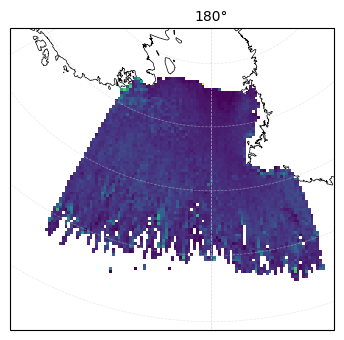

In [255]:
# Draw map version 2 ===========================================================
fig = plt.figure(figsize=(8,4), dpi= 100)
ax = plt.axes(projection=ccrs.SouthPolarStereo())

lons = np.arange(-180, -89)
# ax.plot(lons, np.ones(len(lons))*(-65), transform=ccrs.PlateCarree(), lw=2, color = "y")
# ax.plot([-180, -180], [-65, -78], transform=ccrs.PlateCarree(), lw=2, color = "y")
# ax.plot([-90, -90], [-65, -73], transform=ccrs.PlateCarree(), lw=2, color = "y")

# ax.add_feature(cartopy.feature.LAND)
# # ax.add_feature(cartopy.feature.BORDERS)
# ax.add_feature(cartopy.feature.OCEAN, color = (0,0,0.3))

# # import cartopy.feature as cfeature
# ice_shelves = cfeature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_polys', '10m')
# ax.add_feature(ice_shelves, facecolor = "w", edgecolor='k', linewidth=0.5, linestyle='-')
# # ax.add_feature(cartopy.feature.COASTLINE)

ax.coastlines('10m', linewidth = 0.5)

# sc = ax.scatter(df2['lon'], df2['lat'], c=df2[field], cmap=cmap, s = 10,
#                 vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), marker = "o", facecolors='none')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='lightgrey', alpha=0.5, linestyle='--')

# gl.xlocator = mticker.FixedLocator(np.arange(-180,180,15))
# gl.ylocator = mticker.FixedLocator(np.arange(-90,90,5))
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER

ax.pcolormesh(xx, yy, np.nanmean(fb_mode, axis = 0).transpose())

xmin, xmax = plt.xlim(-1800000, 1100000)
ymin, ymax = plt.ylim(-3200000, -800000)

In [324]:
xp = np.arange(-2000000, 1500001, 25000)
yp = np.arange(-3200000, -800001, 25000)

xx, yy = np.meshgrid(xp, yp)
lats, lons = transform(Proj("EPSG:3412"), Proj("EPSG:4326"), xx, yy) 

x_len = len(xp)
y_len = len(yp)

wide = 25000

polygons = []
for x0 in xp[:]:
    for y0 in yp[:]:
        polygons.append(Polygon([(x0,y0), (x0+wide, y0), (x0+wide, y0+wide), (x0, y0+wide)]))

grid = geopandas.GeoDataFrame({'geometry':polygons})
grid['id'] = grid.index

In [10]:
grid

,geometry,id
0,"POLYGON ((-2000000.000 -3200000.000, -1975000....",0
1,"POLYGON ((-2000000.000 -3175000.000, -1975000....",1
2,"POLYGON ((-2000000.000 -3150000.000, -1975000....",2
3,"POLYGON ((-2000000.000 -3125000.000, -1975000....",3
4,"POLYGON ((-2000000.000 -3100000.000, -1975000....",4
...,...,...
13531,"POLYGON ((1500000.000 -925000.000, 1525000.000...",13531
13532,"POLYGON ((1500000.000 -900000.000, 1525000.000...",13532
13533,"POLYGON ((1500000.000 -875000.000, 1525000.000...",13533
13534,"POLYGON ((1500000.000 -850000.000, 1525000.000...",13534


In [359]:
grid

,geometry,id
0,"POLYGON ((-2000000.000 -3200000.000, -1975000....",0
1,"POLYGON ((-2000000.000 -3175000.000, -1975000....",1
2,"POLYGON ((-2000000.000 -3150000.000, -1975000....",2
3,"POLYGON ((-2000000.000 -3125000.000, -1975000....",3
4,"POLYGON ((-2000000.000 -3100000.000, -1975000....",4
...,...,...
13531,"POLYGON ((1500000.000 -925000.000, 1525000.000...",13531
13532,"POLYGON ((1500000.000 -900000.000, 1525000.000...",13532
13533,"POLYGON ((1500000.000 -875000.000, 1525000.000...",13533
13534,"POLYGON ((1500000.000 -850000.000, 1525000.000...",13534


In [402]:
NW = (lat>-74) & (lat<-70) & ((lon<-172) | (lon>168))
SW = (lat>-78) & (lat<-74) & ((lon<-172) | (lon>168))
SE = (lat>-78) & (lat<-74) & ((lon<-150) & (lon>-172))
NE = (lat>-74) & (lat<-70) & ((lon<-150) & (lon>-172))

(96, 141)

In [489]:
from pyproj import Proj, transform
inProj  = Proj("+init=EPSG:4326")
outProj = Proj("+init=EPSG:3031")

In [503]:
offset = 0.5

lons = np.concatenate((np.arange(168, 181), np.arange(-180, -171)))
lats = np.concatenate((np.ones(len(lons))*(-70+offset), np.ones(len(lons))*(-74+offset), np.array([-70+offset])))
lons = np.concatenate((lons, lons[::-1], np.array([168])))

NW_x, NW_y = transform(inProj,outProj,lons,lats)

lons = (np.arange(-172, -149))
lats = np.concatenate((np.ones(len(lons))*(-70+offset), np.ones(len(lons))*(-74+offset), np.array([-70+offset])))
lons = np.concatenate((lons, lons[::-1], np.array([-172])))

NE_x, NE_y = transform(inProj,outProj,lons,lats)

lons = np.concatenate((np.arange(162, 181), np.arange(-180, -171)))
lats = np.concatenate((np.ones(len(lons))*(-74+offset), np.ones(len(lons))*(-78+offset), np.array([-74+offset])))
lons = np.concatenate((lons, lons[::-1], np.array([162])))

SW_x, SW_y = transform(inProj,outProj,lons,lats)

lons = (np.arange(-172, -149))
lats = np.concatenate((np.ones(len(lons))*(-74+offset), np.ones(len(lons))*(-78+offset), np.array([-74+offset])))
lons = np.concatenate((lons, lons[::-1], np.array([-172])))

SE_x, SE_y = transform(inProj,outProj,lons,lats)

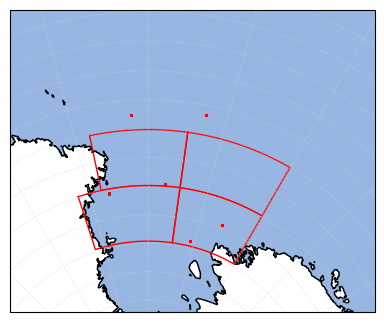

In [506]:


# Draw map version 2 ===========================================================
fig = plt.figure(figsize=(8,4), dpi= 100)
ax = plt.axes(projection=ccrs.SouthPolarStereo())

lons = np.arange(-180, -89)

# pm = ax.pcolormesh(xx, yy, grid["id"].values.reshape(np.shape(yy)), alpha = 0.8)
# pm = grid.plot("id", ax = ax)

for i in [5444, 5889, 6409, 7159, 8193, 8890]:
    point = grid[grid["id"] == i]
    point.plot(ax = ax, color ="r")
    
# fig.colorbar(pm)

ax.coastlines('10m', linewidth = 1)
# ax.fill_continents(color='lightgray',lake_color='white')
ax.add_feature(cartopy.feature.OCEAN)

# lons = np.concatenate((np.arange(160, 180), np.arange(-180, -150))) #np.arange(160, 180).append(np.arange(-180, -150))
ax.plot(NW_x, NW_y, lw=1, color = "r")
ax.plot(NE_x, NE_y, lw=1, color = "r")
ax.plot(SW_x, SW_y, lw=1, color = "r")
ax.plot(SE_x, SE_y, lw=1, color = "r")
# ax.plot([-180, -180], [-65, -78], transform=ccrs.PlateCarree(), lw=2, color = "y")
# ax.plot([-90, -90], [-65, -73], transform=ccrs.PlateCarree(), lw=2, color = "y")

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='lightgrey', alpha=0.5, linestyle='--')

gl.xlocator = mticker.FixedLocator(np.arange(-180,180,15))
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,2))
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER


xmin, xmax = ax.set_xlim(1100000, -1800000)
ymin, ymax = ax.set_ylim(-800000, -3200000)

In [413]:
np.concatenate((np.arange(160, 180), np.arange(-180, -150)))

array([ 160,  161,  162,  163,  164,  165,  166,  167,  168,  169,  170,
        171,  172,  173,  174,  175,  176,  177,  178,  179, -180, -179,
       -178, -177, -176, -175, -174, -173, -172, -171, -170, -169, -168,
       -167, -166, -165, -164, -163, -162, -161, -160, -159, -158, -157,
       -156, -155, -154, -153, -152, -151])

## Draw scatter plot of kriging estimation

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
from scipy import stats
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

def MBE(x, y): # ----------------------------------------------------------------
    # Calculate Mean absolute difference between 2 variabes
    # x and y should have same dimensions
    value = 0   
    if len(x) == len(y):
        if len(x) > 0:
            for i in range(0,len(x)):
                value = value + x[i]-y[i]
            value = value / len(x)
    return value

def RMSE(x, y, r = False): # ----------------------------------------------------------------
    # Calculate Mean difference between 2 variabes
    # x and y should have same dimensions
    # x: estimate value, y: true value
    value = 0   
    if len(x) == len(y):
        if len(x) > 0:
            for i in range(0,len(x)):
                value = value + (x[i]-y[i])**2
            value = (value / len(x))**0.5
    if r:
        value = value/np.mean(y)*100
    return value

filename = r"F:\2022_Ross\ATL10_shp_Ross_10km_mode\Weekly_merge\Kriging_test\Scatter\Kriging_result_maxlag_EXPONENTIAL_10.csv"
df = pd.read_csv(filename, index_col = 0);

x = df['predict']
y = df['measure']

# model = LinearRegression().fit(x, y) 
a, b, r_value, pvalue, stderr = stats.linregress(x, y)


0.0

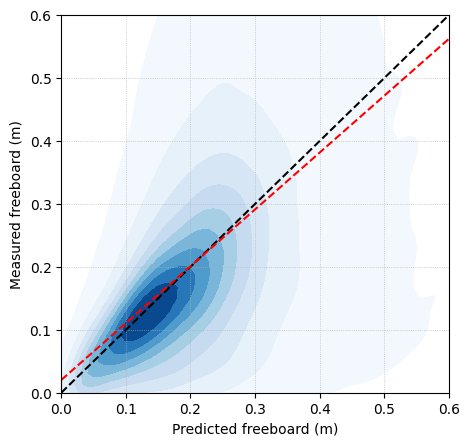

In [21]:
plt.figure(figsize = (5,5), dpi = 100)
# Plotting the KDE Plot 
sns.kdeplot(df['predict'], df['measure'],
            color='r', shade=True, Label='iris_virginica', 
            cmap="Blues", shade_lowest=False)

# plt.scatter(df['predict'], df['measure'])
xd = np.arange(0, 2)
yd = a*xd + b

plt.plot(xd, xd, color = 'k', ls = "--")
plt.plot(xd, yd, color = 'r', ls = "--")

plt.xlim(0, 0.6)
plt.ylim(0, 0.6)
plt.xlabel("Predicted freeboard (m)")
plt.ylabel("Measured freeboard (m)")
plt.grid(ls = ":", lw = 0.5)

In [23]:
from scipy.stats import gaussian_kde
kernel = gaussian_kde(np.vstack([x, y]))
c = kernel(np.vstack([x, y]))

In [26]:
filename = r"F:\2022_Ross\ATL10_shp_Ross_10km_mode\Weekly_merge\Kriging_test\Scatter\Kriging_result_maxlag_EXPONENTIAL_10_add.csv"
df['density'] = c
df.to_csv(filename)

In [3]:
filename = r"F:\2022_Ross\ATL10_shp_Ross_10km_mode\Weekly_merge\Kriging_test\Scatter\Kriging_result_maxlag_EXPONENTIAL_10_add.csv"
df = pd.read_csv(filename, index_col = 0).reset_index(drop=True)

x = df['predict'].values
y = df['measure'].values

# model = LinearRegression().fit(x, y) 
a, b, r_value, pvalue, stderr = stats.linregress(x, y)

# plt.figure(figsize = (4.5,3.5))

# plt.scatter(df['predict'], df['measure'], s = 5, c = df['density'], cmap = "Blues")
# plt.colorbar(shrink = 0.7, label = "Kernel Density")

# # plt.scatter(df['predict'], df['measure'])
# xd = np.arange(0, 2)
# yd = a*xd + b

# plt.plot(xd, xd, color = 'k', ls = "--")
# plt.plot(xd, yd, color = 'r', ls = "--")

# rmse = RMSE(x,y)
# mbe = MBE(x,y)


# plt.xlim(0, 0.5)
# plt.ylim(0, 0.5)
# plt.xlabel("Predicted freeboard (m)")
# plt.ylabel("Measured freeboard (m)")
# plt.grid(ls = ":", lw = 0.5)
# plt.text(0.02, 0.46, "y={0:.2f}x+{1:.2f}".format(a,b), fontsize = 12)
# plt.text(0.02, 0.42, "R={0:.2f} (p={1:.2f})".format(r_value, pvalue), fontsize = 12)
# plt.text(0.02, 0.38, "RMSD={0:.2f} m".format(rmse), fontsize = 12);
# plt.text(0.02, 0.34, "MBD={0:.2f} m".format(mbe), fontsize = 12);

In [7]:
import datetime as dt

In [96]:
df.reset_index(drop=True)

,predict,measure,date,lat,lon,range,nugget,sill,model,density
0,0.374874,0.232593,20181011,-76.125864,-160.953367,22088.755096,1.892412e-02,0.022432,EXPONENTIAL,1.234264
1,0.351002,0.216410,20181011,-75.823910,-161.158688,22088.755096,1.892412e-02,0.022432,EXPONENTIAL,1.894745
2,0.339860,0.170669,20181011,-75.764649,-161.198086,22088.755096,1.892412e-02,0.022432,EXPONENTIAL,2.164601
3,0.297999,0.033605,20181011,-75.590640,-161.312144,22088.755096,1.892412e-02,0.022432,EXPONENTIAL,1.509314
4,0.289343,0.107658,20181011,-75.527436,-161.352964,22088.755096,1.892412e-02,0.022432,EXPONENTIAL,3.352319
...,...,...,...,...,...,...,...,...,...,...
134998,0.438216,0.098800,20220929,-76.022241,169.964929,5186.566748,4.993491e-12,0.025489,EXPONENTIAL,0.446674
134999,0.196664,0.098077,20220929,-76.345557,169.746737,5186.566748,4.993491e-12,0.025489,EXPONENTIAL,10.783542
135000,0.168621,0.016339,20220929,-76.785146,169.434994,5186.566748,4.993491e-12,0.025489,EXPONENTIAL,4.417862
135001,0.182478,0.153200,20220929,-76.847380,169.389385,5186.566748,4.993491e-12,0.025489,EXPONENTIAL,21.732053


In [105]:
for i in range(0, len(df)):
    df.loc[i, "datetime"] = dt.datetime.strptime(str(df.loc[i, "date"]), "%Y%m%d")
    df.loc[i, "year"] = df.loc[i, "datetime"].year
    df.loc[i, "month"] = df.loc[i, "datetime"].month
    df.loc[i, "day"] = df.loc[i, "datetime"].day
    

In [22]:
def get_errors(df):
    rmse = RMSE(df['predict'].values, df['measure'].values)
    mbe = MBE(df['predict'].values, df['measure'].values)
    r = np.corrcoef(df['predict'].values, df['measure'].values)[1,0]
    k_range = df['range'].mean()
    sill = df['sill'].mean()
    df2 = pd.DataFrame({"rmse": [rmse], "mbe": [mbe], 'R': [r], 'range': [k_range], 'sill': [sill]})
    return df2

In [23]:
dfw = df.groupby(by = "date").apply(get_errors).reset_index(drop = False)

for i in range(0, len(dfw)):
    dfw.loc[i, "datetime"] = dt.datetime.strptime(str(dfw.loc[i, "date"]), "%Y%m%d")
    dfw.loc[i, "year"] = dfw.loc[i, "datetime"].year
    dfw.loc[i, "month"] = dfw.loc[i, "datetime"].month
    dfw.loc[i, "day"] = dfw.loc[i, "datetime"].day

In [24]:
dfw

,date,level_1,rmse,mbe,R,range,sill,datetime,year,month,day
0,20181011,0,0.186579,-0.001157,0.514804,22088.755096,0.022432,2018-10-11,2018.0,10.0,11.0
1,20181018,0,0.199457,-0.019331,0.516799,16906.365979,0.022446,2018-10-18,2018.0,10.0,18.0
2,20181025,0,0.187033,-0.003148,0.520928,5902.060655,0.027141,2018-10-25,2018.0,10.0,25.0
3,20181101,0,0.160175,0.014163,0.595894,8332.727885,0.039017,2018-11-01,2018.0,11.0,1.0
4,20181108,0,0.134151,-0.003444,0.363291,8628.980005,0.015722,2018-11-08,2018.0,11.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
171,20220901,0,0.167714,-0.002048,0.480783,4671.533035,0.021366,2022-09-01,2022.0,9.0,1.0
172,20220908,0,0.184543,-0.002461,0.514361,7425.235324,0.018908,2022-09-08,2022.0,9.0,8.0
173,20220915,0,0.175878,-0.004542,0.542750,145443.078771,0.029156,2022-09-15,2022.0,9.0,15.0
174,20220922,0,0.134896,0.002393,0.533489,6305.864356,0.017237,2022-09-22,2022.0,9.0,22.0


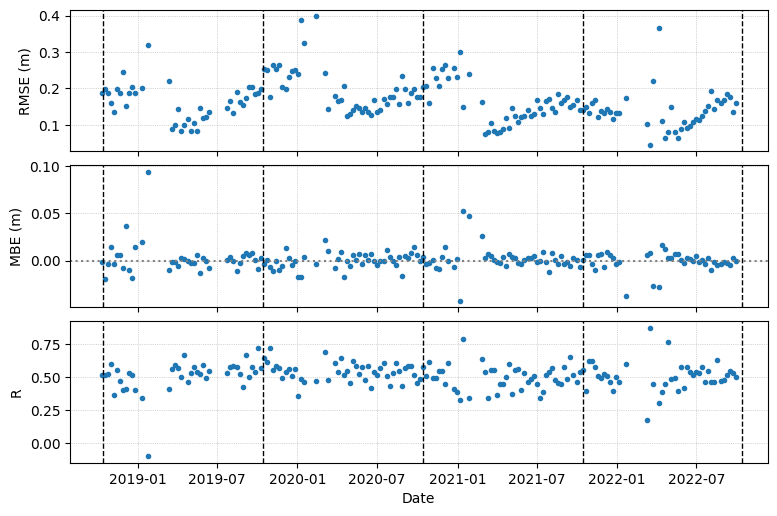

In [25]:
fig, ax = plt.subplots(3,1,figsize = (9,6), dpi = 100, sharex = True)
plt.subplots_adjust(hspace=0.1, wspace = 0.0)
ax[0].plot(dfw['datetime'], dfw['rmse'], '.')
ax[0].set_ylabel("RMSE (m)")

ax[1].plot(dfw['datetime'], dfw['mbe'], '.')
ax[1].set_ylabel("MBE (m)")
ax[1].axhline(0, color = "gray", ls = ":")

ax[2].plot(dfw['datetime'], dfw['R'], '.')
ax[2].set_ylabel("R")

ax[2].set_xlabel("Date")

for i in range(0, len(ax)):
    for year in [2018, 2019, 2020, 2021, 2022]:
        ax[i].axvline(dt.datetime(year, 10, 14), color = 'k', ls = "--", lw = 1.0)
        ax[i].grid(ls=":", lw=0.5)

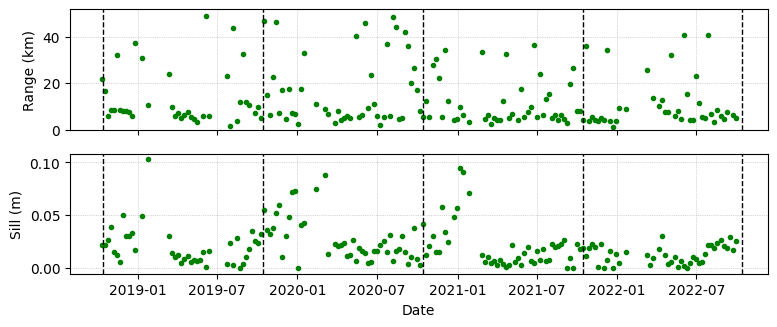

In [35]:
fig, ax = plt.subplots(2,1,figsize = (9,3.5), dpi = 100, sharex = True)

ax[0].plot(dfw['datetime'], dfw['range']/1000, '.', color = "g")
ax[0].set_ylabel("Range (km)")
ax[0].set_ylim(0, 52)

ax[1].plot(dfw['datetime'], dfw['sill'], '.', color = "g")
ax[1].set_ylabel("Sill (m)")

ax[1].set_xlabel("Date")


for i in range(0, len(ax)):
    for year in [2018, 2019, 2020, 2021, 2022]:
        ax[i].axvline(dt.datetime(year, 10, 14), color = 'k', ls = "--", lw = 1.0)
        ax[i].grid(ls=":", lw=0.5)

In [37]:
np.median(dfw['range']), np.median(dfw['sill'])

(7825.566234541488, 0.0159872786356368)

In [33]:
path = "F:\\2022_Ross\\Kriging_maps\\"
filename = r"F:\2022_Ross\ATL10_shp_Ross_10km_mode\Weekly_merge\Kriging_test\Scatter\Kriging_result_maxlag_EXPONENTIAL_10_add.csv"
df = pd.read_csv(filename, index_col = 0).reset_index(drop=True)

F:\2022_Ross\Kriging_maps

0.5694003868157536